# body length evaluation

In [561]:
import numpy as np
import pandas as pd
# read excel updated_full_filtered.xlsx
df = pd.read_excel(r'C:\Users\gbo10\Videos\research\counting_research_algorithms\fifty_one\measurements\Updated_full_Filtered_Data_with_real_length.xlsx')

print(f'before {len(df)}')

#drop rows with NaN values
df = df.dropna()   

print(f'after {len(df)}')

mean_std=df['Std_Length'].mean()

df['RealLength_MEC(cm)']=df['RealLength_MEC(cm)']
df['RealLength_Skeleton(cm)']=df['RealLength_Skeleton(cm)']


std_length_1 = df['Length_1'].std()
std_length_2 = df['Length_2'].std()
std_length_3 = df['Length_3'].std()




for i in range(1, 4):
    df[f'error_length_MEC_{i}'] = abs(df['RealLength_MEC(cm)'] - df[f'Length_{i}'])
    df[f'error_length_ske_{i}'] = abs(df['RealLength_Skeleton(cm)'] - df[f'Length_{i}'])

# Calculate mean errors and standard deviations
mae_mec = []
mae_ske = []
std_mec = []
std_ske = []
corr_mec = []
corr_ske = []

for i in range(1, 4):
    mae_mec.append(df[f'error_length_MEC_{i}'].mean())
    mae_ske.append(df[f'error_length_ske_{i}'].mean())
    std_mec.append(df[f'error_length_MEC_{i}'].std())
    std_ske.append(df[f'error_length_ske_{i}'].std())
    corr_mec.append(df['RealLength_MEC(cm)'].corr(df[f'Length_{i}']))
    corr_ske.append(df['RealLength_Skeleton(cm)'].corr(df[f'Length_{i}']))

# Create a DataFrame to display the results
performance_df = pd.DataFrame({
    'Measurement': [1, 2, 3],
    'MAE_MEC': mae_mec,
    'STD_MEC': std_mec,
    'Corr_MEC': corr_mec,
    'MAE_Skeleton': mae_ske,
    'STD_Skeleton': std_ske,
    'Corr_Skeleton': corr_ske
})

#the same but each time using largest from length_1, length_2, length_3 
# Calculate mean errors and standard deviations
mae_mec = []
mae_ske = []
std_mec = []
std_ske = []
corr_mec = []
corr_ske = []
print(performance_df)
#the max from length_1, length_2, length_3
# Calculate mean errors and standard deviations
    

#difference between max length to min length
df['max_length'] = df[['Length_1', 'Length_2', 'Length_3']].max(axis=1)
df['min_length'] = df[['Length_1', 'Length_2', 'Length_3']].min(axis=1)
df['diff_max_min'] = df['max_length'] - df['min_length']

print(df['diff_max_min'].mean())    


before 132
after 122
   Measurement    MAE_MEC    STD_MEC  Corr_MEC  MAE_Skeleton  STD_Skeleton  \
0            1  26.316173  12.627652  0.827162     29.985645     17.818620   
1            2  27.763540  14.174676  0.805693     31.174671     18.345098   
2            3  22.934706  12.895959  0.798224     26.978657     16.562143   

   Corr_Skeleton  
0       0.708489  
1       0.720788  
2       0.703450  
13.906426229508195


In [562]:
# length_1, length_2, length_3 in pixels based on scale_1, scale_2, scale_3 if the scale is based on 10mm = 1cm

df['Length_1_pixels'] = df['Length_1'] *df['Scale_1']/10
df['Length_2_pixels'] = df['Length_2'] *df['Scale_2']/10
df['Length_3_pixels'] = df['Length_3'] *df['Scale_3']/10


In [563]:
print(df['Length_1_pixels'].mean())

663.0600990081967


In [564]:
# Calculate the maximum of the three validation measurements for each prawn
df['Max_Length'] = df[['Length_1', 'Length_2', 'Length_3']].max(axis=1)
# For MEC method
df['Max_Length_pixels'] = df[['Length_1_pixels', 'Length_2_pixels', 'Length_3_pixels']].max(axis=1) 

df['Mean_Length'] = df['Max_Length']



df['Error_MEC'] = df['RealLength_MEC(cm)'] - df['Mean_Length']
df['Abs_Error_MEC'] = df['Error_MEC'].abs()

#MAPE
df['MAPE'] = (df['Abs_Error_MEC'] / df['Max_Length']) * 100

#divide to quartiles by MAPE
df['MAPE_quartile'] = pd.qcut(df['MAPE'], 4, labels=False)

#length of each quartile
print(df.groupby('MAPE_quartile')['MAPE'].count())

#print the mean of each quartile
print(df.groupby('MAPE_quartile')['MAPE'].median())

# For Skeleton method
df['Error_Skeleton'] = df['RealLength_Skeleton(cm)'] - df['Mean_Length']
df['Abs_Error_Skeleton'] = df['Error_Skeleton'].abs()
# MEC method
mean_error_mec = df['Error_MEC'].mean()
std_error_mec = df['Error_MEC'].std()
mae_mec = df['Abs_Error_MEC'].mean()
rmse_mec = np.sqrt((df['Abs_Error_MEC'] ** 2).mean())

print(f"MEC Method - Mean Error: {mean_error_mec:.2f} mm")
print(f"MEC Method - Standard Deviation of Error: {std_error_mec:.2f} mm")
print(f"MEC Method - MAE: {mae_mec:.2f} mm")
print(f"MEC Method - RMSE: {rmse_mec:.2f} mm")

# Skeleton method
mean_error_skeleton = df['Error_Skeleton'].mean()
std_error_skeleton = df['Error_Skeleton'].std()
mae_skeleton = df['Abs_Error_Skeleton'].mean()
rmse_skeleton = np.sqrt((df['Error_Skeleton'] ** 2).mean())

print(f"Skeleton Method - Mean Error: {mean_error_skeleton:.2f} mm")
print(f"Skeleton Method - Standard Deviation of Error: {std_error_skeleton:.2f} mm")
print(f"Skeleton Method - MAE: {mae_skeleton:.2f} mm")
print(f"Skeleton Method - RMSE: {rmse_skeleton:.2f} mm")


MAPE_quartile
0    31
1    30
2    30
3    31
Name: MAPE, dtype: int64
MAPE_quartile
0     3.090973
1    12.462560
2    19.579660
3    33.458735
Name: MAPE, dtype: float64
MEC Method - Mean Error: 17.95 mm
MEC Method - Standard Deviation of Error: 14.82 mm
MEC Method - MAE: 19.60 mm
MEC Method - RMSE: 23.24 mm
Skeleton Method - Mean Error: 21.41 mm
Skeleton Method - Standard Deviation of Error: 19.18 mm
Skeleton Method - MAE: 23.77 mm
Skeleton Method - RMSE: 28.69 mm


               count       mean        std        min        25%        50%  \
MAPE_quartile                                                                 
0               31.0   3.620046   2.056940   0.059257   1.961710   3.090973   
1               30.0  12.347421   2.715448   7.923306  10.065427  12.462560   
2               30.0  20.010757   2.475291  16.814344  17.681276  19.579660   
3               31.0  40.315770  23.387804  24.266729  29.976916  33.458735   

                     75%         max  
MAPE_quartile                         
0               5.129837    7.733976  
1              14.542953   16.582308  
2              22.231945   23.955818  
3              37.071796  129.282083  


<Axes: title={'center': 'MAPE'}, xlabel='MAPE_quartile'>

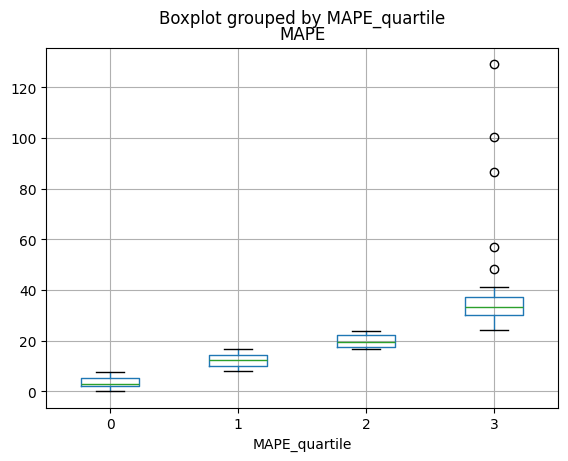

In [565]:
#distrtbtion of each quartile
print(df.groupby('MAPE_quartile')['MAPE'].describe())
#boxplots
df.boxplot(column='MAPE', by='MAPE_quartile')


In [491]:
#correlation in each quartile to the real length
print(df.groupby('MAPE_quartile')['RealLength_MEC(cm)'].corr(df['Mean_Length']))


MAPE_quartile
0    0.965055
1    0.904604
2    0.823236
3    0.929672
Name: RealLength_MEC(cm), dtype: float64


In [492]:
# perfromance of each quartile
mae_mec = []
mae_ske = []
std_mec = []
std_ske = []
corr_mec = []
corr_ske = []

for i in range(4):
    mae_mec.append(df[df['MAPE_quartile'] == i]['Abs_Error_MEC'].mean())
    mae_ske.append(df[df['MAPE_quartile'] == i]['Abs_Error_Skeleton'].mean())
    std_mec.append(df[df['MAPE_quartile'] == i]['Abs_Error_MEC'].std())
    std_ske.append(df[df['MAPE_quartile'] == i]['Abs_Error_Skeleton'].std())
    corr_mec.append(df[df['MAPE_quartile'] == i]['RealLength_MEC(cm)'].corr(df[df['MAPE_quartile'] == i]['Mean_Length']))
    corr_ske.append(df[df['MAPE_quartile'] == i]['RealLength_Skeleton(cm)'].corr(df[df['MAPE_quartile'] == i]['Mean_Length']))

performance_df = pd.DataFrame({
    'Quartile': range(4),
    'MAE_MEC': mae_mec,
    'STD_MEC': std_mec,
    'Corr_MEC': corr_mec,
    'MAE_Skeleton': mae_ske,
    'STD_Skeleton': std_ske,
    'Corr_Skeleton': corr_ske
})

print(performance_df)

   Quartile    MAE_MEC    STD_MEC  Corr_MEC  MAE_Skeleton  STD_Skeleton  \
0         0   4.661448   2.450686  0.965055     11.162041      7.172766   
1         1  15.986833   3.982905  0.904604     20.386443     11.280821   
2         2  23.112724   3.474359  0.823236     24.424459     14.160106   
3         3  34.623930  10.568839  0.929672     39.024261     16.267881   

   Corr_Skeleton  
0       0.875815  
1       0.745290  
2       0.721675  
3       0.847065  


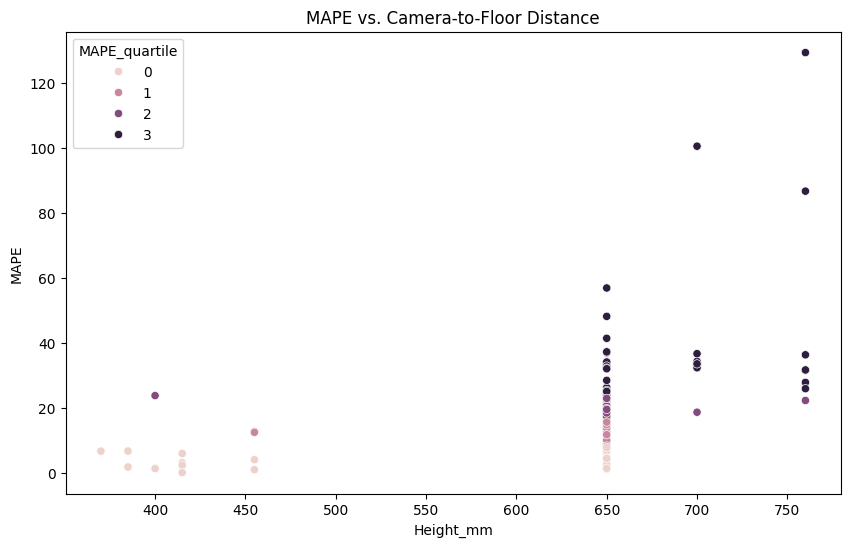

In [493]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height_mm', y='MAPE', hue='MAPE_quartile', data=df)
plt.title('MAPE vs. Camera-to-Floor Distance')
plt.show()


In [566]:
#quartiles  by MAE
df['MAE_quartile'] = pd.qcut(df['Abs_Error_MEC'], 4, labels=False)
print(df.groupby('MAE_quartile')['Abs_Error_MEC'].mean())

MAE_quartile
0     4.661448
1    15.426249
2    22.510370
3    35.749353
Name: Abs_Error_MEC, dtype: float64


In [567]:
#MAE
df['MAE'] = abs(df['RealLength_MEC(cm)'] - df['Max_Length'])

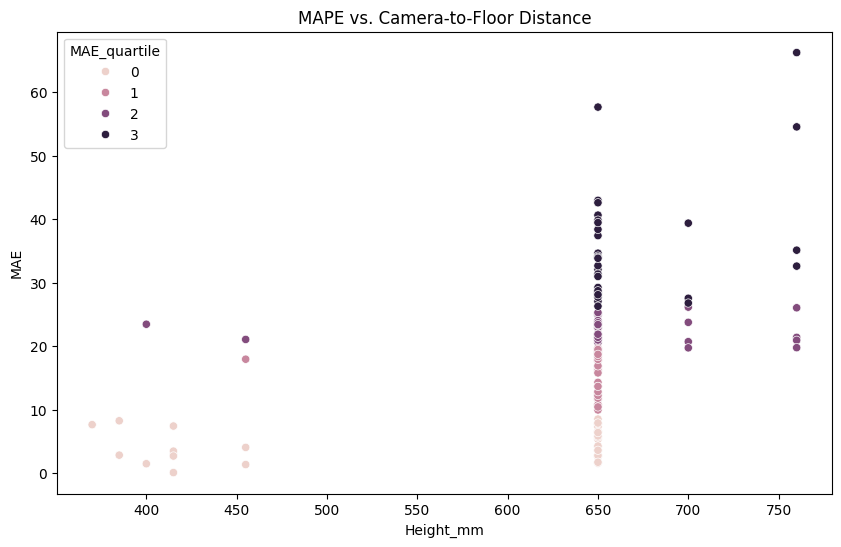

In [496]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height_mm', y='MAE', hue='MAE_quartile', data=df)
plt.title('MAPE vs. Camera-to-Floor Distance')
plt.show()


In [568]:
#how difference in pixels affect difference in predicted length and real length
df['Error_MEC_pixels'] = df['Diameter_pixels'] - df['Max_Length_pixels']
df['Abs_Error_MEC_pixels'] = df['Error_MEC_pixels'].abs()

#MAPE
df['MAPE_pixels'] = (df['Abs_Error_MEC_pixels'] / df['Max_Length_pixels']) *100

#compare the MAPE to the MAPE_pixels
df['MAPE_diff'] =abs( df['MAPE'] - df['MAPE_pixels'])

print(df['MAPE_diff'].median())


9.248187354100375


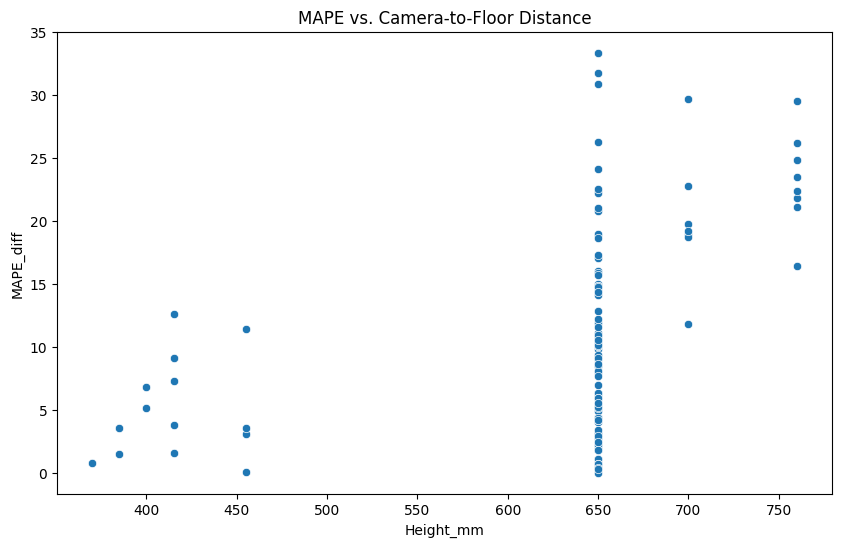

In [498]:
#see where the MAPE_diff  based on height
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height_mm', y='MAPE_diff', data=df)
plt.title('MAPE vs. Camera-to-Floor Distance')
plt.show()

In [569]:
#save the data to excel
df.to_excel(r'C:\Users\gbo10\Videos\research\counting_research_algorithms\fifty_one\measurements\Updated_full_Filtered_Data_with_real_length_with_quartiles.xlsx', index=False)

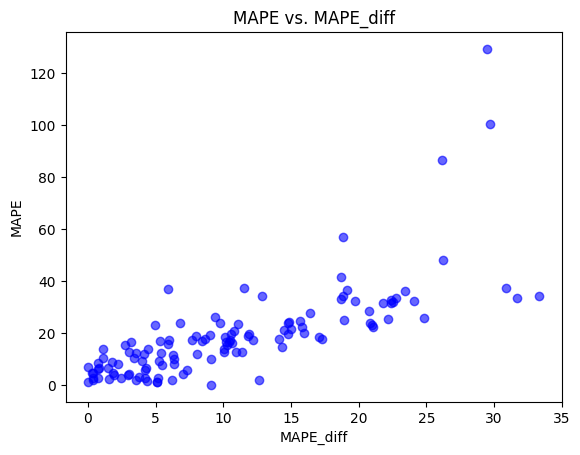

In [570]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is df and it has a 'pondtype' column
plt.figure(figsize=(8, 6))

# Create a scatter plot with Seaborn
sns.scatterplot(x='MAPE_diff', y='MAPE', hue='PondType', data=df, palette='Set1')

# Add plot labels and title
plt.title('MAPE vs. MAPE_diff by Pond Type')
plt.xlabel('MAPE_diff')
plt.ylabel('MAPE')

# Show the legend
plt.legend(title='Pond Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()



In [500]:
from scipy.stats import f_oneway

if 'PondType' in df.columns:
    ponds = df['PondType'].unique()
    
    # For MEC method
    error_groups_mec = [df[df['PondType'] == pond]['Abs_Error_MEC'] for pond in ponds]
    f_stat_mec, p_value_mec = f_oneway(*error_groups_mec)
    print(f"MEC Method - ANOVA F-statistic: {f_stat_mec:.2f}, p-value: {p_value_mec:.4f}")

    # For Skeleton method
    error_groups_skeleton = [df[df['PondType'] == pond]['Error_Skeleton'] for pond in ponds]
    f_stat_skeleton, p_value_skeleton = f_oneway(*error_groups_skeleton)
    print(f"Skeleton Method - ANOVA F-statistic: {f_stat_skeleton:.2f}, p-value: {p_value_skeleton:.4f}")
else:
    print("Pond_Type column not found in the dataset.")


MEC Method - ANOVA F-statistic: 15.40, p-value: 0.0000
Skeleton Method - ANOVA F-statistic: 16.83, p-value: 0.0000


# validation analysis

In [501]:
# Calculate the mean and standard deviation of the three lengths for each prawn
df['Mean_Length'] = df[['Length_1', 'Length_2', 'Length_3']].mean(axis=1)
df['Std_Length'] = df[['Length_1', 'Length_2', 'Length_3']].std(axis=1)
# Overall statistics
overall_mean_std = df['Std_Length'].mean()
print(f"Average standard deviation of lengths: {overall_mean_std:.2f} cm")


Average standard deviation of lengths: 7.28 cm


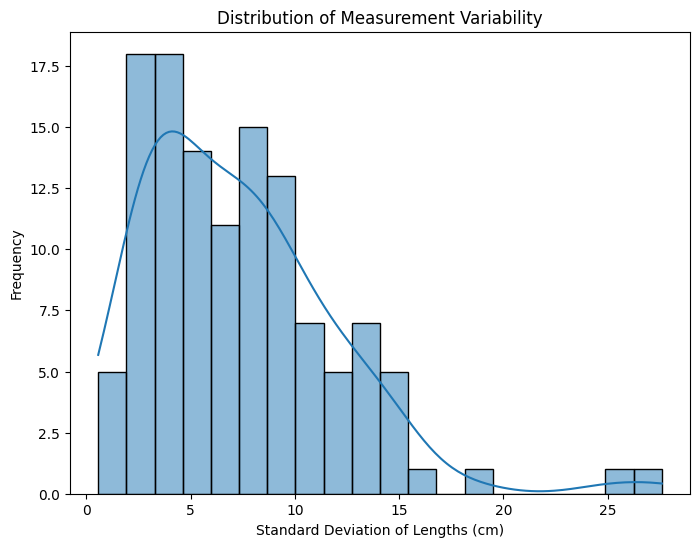

In [502]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df['Std_Length'], bins=20, kde=True)
plt.xlabel('Standard Deviation of Lengths (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Measurement Variability')
plt.show()


Scale statistics:
           Scale_1     Scale_2     Scale_3
count  122.000000  122.000000  122.000000
mean    60.025123   62.084008   58.933607
std      9.537647    8.750247    8.415180
min     48.918000   49.477000   47.170000
25%     54.755000   56.436000   54.601000
50%     57.035000   60.374000   57.123500
75%     62.129000   64.443750   61.522000
max    103.730000   98.717000   89.822000
Correlation between Scale_1 and Length_1: -0.0181
Correlation between Scale_2 and Length_2: -0.1020
Correlation between Scale_3 and Length_3: -0.0187


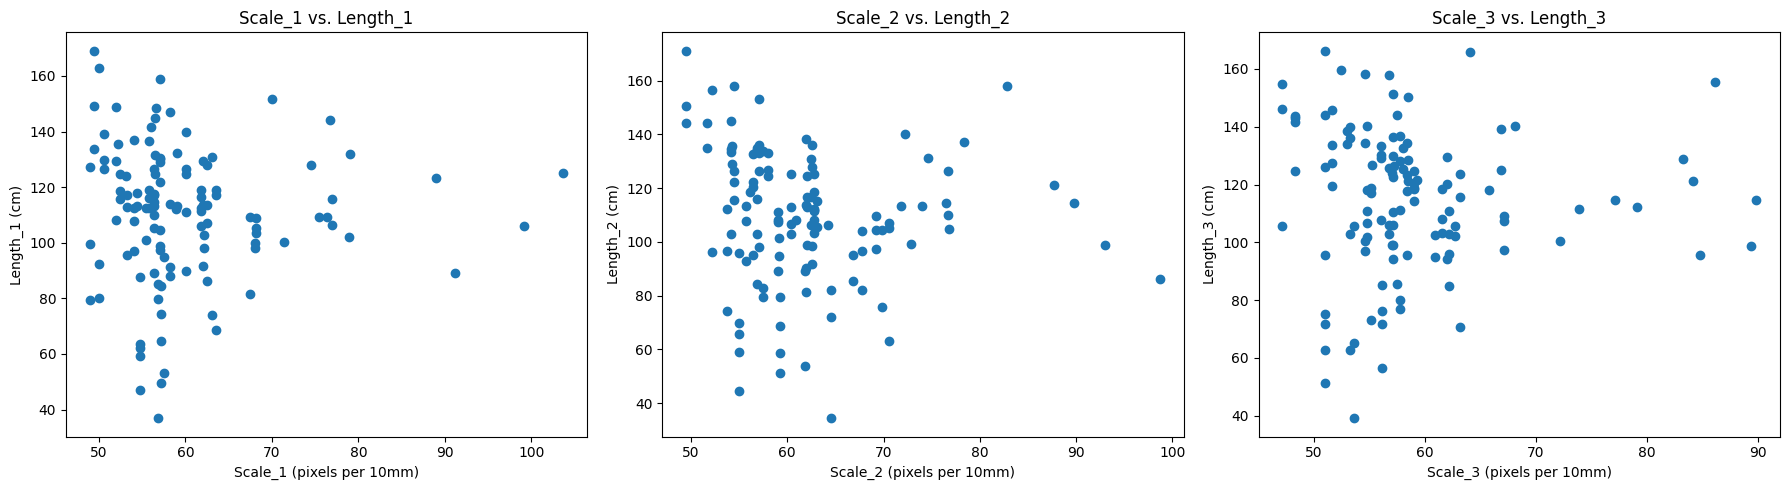

In [503]:
# Descriptive statistics of scales
scales = ['Scale_1', 'Scale_2', 'Scale_3']
scale_stats = df[scales].describe()
print("Scale statistics:\n", scale_stats)
# Calculate the correlation between scales and lengths
for i in range(1, 4):
    corr = df[f'Scale_{i}'].corr(df[f'Length_{i}'])
    print(f"Correlation between Scale_{i} and Length_{i}: {corr:.4f}")
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i in range(1, 4):
    axs[i-1].scatter(df[f'Scale_{i}'], df[f'Length_{i}'])
    axs[i-1].set_xlabel(f'Scale_{i} (pixels per 10mm)')
    axs[i-1].set_ylabel(f'Length_{i} (cm)')
    axs[i-1].set_title(f'Scale_{i} vs. Length_{i}')
plt.tight_layout()
plt.show()


Pond-wise statistics:
                              mean      median        std  count
PondType                                                       
pond_1\carapace\car    119.587619  113.838667  17.805035     14
pond_1\carapace\left    73.021133   68.095333  23.583171     15
pond_1\carapace\right  116.341756  116.280667  18.716363     93


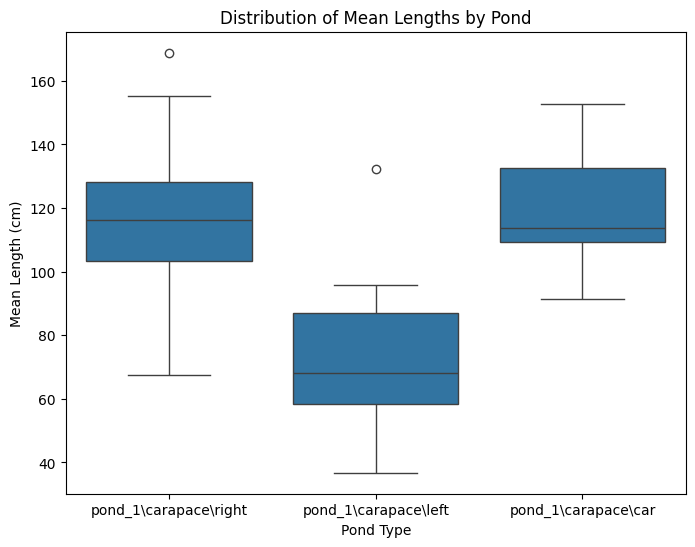

In [504]:



pond_stats = df.groupby('PondType')['Mean_Length'].agg(['mean', 'median', 'std', 'count'])
print("Pond-wise statistics:\n", pond_stats)
plt.figure(figsize=(8,6))
sns.boxplot(x='PondType', y='Mean_Length', data=df)
plt.xlabel('Pond Type')
plt.ylabel('Mean Length (cm)')
plt.title('Distribution of Mean Lengths by Pond')
plt.show()


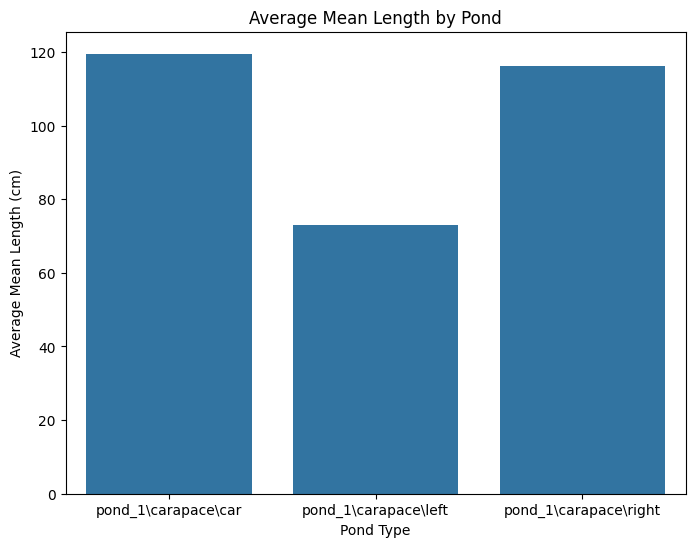

In [505]:
pond_means = df.groupby('PondType')['Mean_Length'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='PondType', y='Mean_Length', data=pond_means)
plt.xlabel('Pond Type')
plt.ylabel('Average Mean Length (cm)')
plt.title('Average Mean Length by Pond')
plt.show()


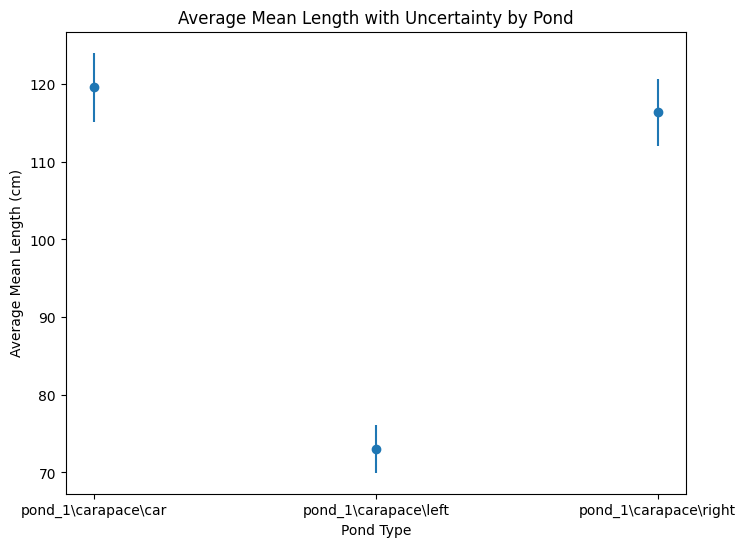

In [506]:
# Standard error of the mean (SEM)
df['SEM_Length'] = df['Std_Length'] / np.sqrt(3)  # Since there are 3 measurements
# If scales are used to convert pixels to cm, calculate uncertainty in length due to scale
for i in range(1, 4):
    df[f'Scale_Uncertainty_{i}'] = df[f'Scale_{i}'].std() / np.sqrt(len(df))
    # Assuming length = (pixel_length / scale) * conversion_factor
    # Propagate uncertainty accordingly
pond_errors = df.groupby('PondType')['SEM_Length'].mean().reset_index()
pond_data = pond_means.merge(pond_errors, on='PondType')

plt.figure(figsize=(8,6))
plt.errorbar(pond_data['PondType'], pond_data['Mean_Length'], yerr=pond_data['SEM_Length'], fmt='o')
plt.xlabel('Pond Type')
plt.ylabel('Average Mean Length (cm)')
plt.title('Average Mean Length with Uncertainty by Pond')
plt.show()


Correlation matrix:
              Mean_Length  Std_Length   Scale_1   Scale_2   Scale_3
Mean_Length     1.000000    0.282268  0.063925 -0.028230  0.052431
Std_Length      0.282268    1.000000  0.020135  0.124642 -0.149955
Scale_1         0.063925    0.020135  1.000000  0.829290  0.851946
Scale_2        -0.028230    0.124642  0.829290  1.000000  0.789903
Scale_3         0.052431   -0.149955  0.851946  0.789903  1.000000


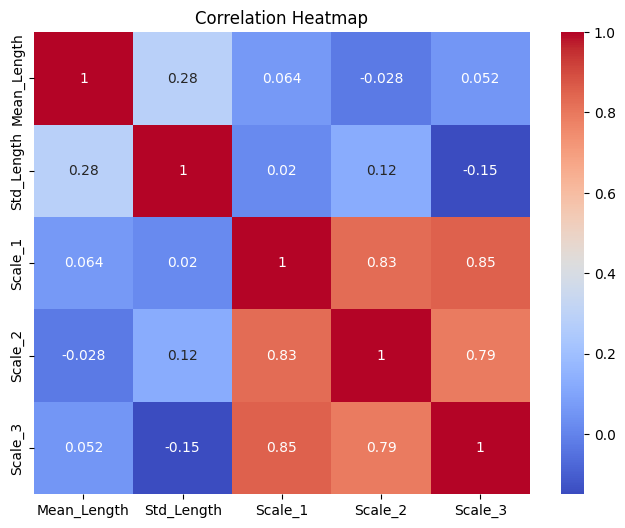

In [507]:
# Select relevant columns
correlation_columns = ['Mean_Length', 'Std_Length', 'Scale_1', 'Scale_2', 'Scale_3']
corr_matrix = df[correlation_columns].corr()
print("Correlation matrix:\n", corr_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [508]:
from scipy.stats import f_oneway

ponds = df['PondType'].unique()
groups = [df[df['PondType'] == pond]['Mean_Length'] for pond in ponds]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA results: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")
import statsmodels.api as sm

# Example: Regress Std_Length on Scale_1
X = df['Scale_1']
y = df['Std_Length']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


ANOVA results: F-statistic = 34.1126, p-value = 0.0000
                            OLS Regression Results                            
Dep. Variable:             Std_Length   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.04867
Date:                Wed, 18 Sep 2024   Prob (F-statistic):              0.826
Time:                        20:00:54   Log-Likelihood:                -359.67
No. Observations:                 122   AIC:                             723.3
Df Residuals:                     120   BIC:                             728.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [509]:
# MEC Method
df['Error_MEC'] = df['RealLength_MEC(cm)'] - df['Mean_Length']
df['Abs_Error_MEC'] = df['Error_MEC'].abs()

# Skeleton Method
df['Error_Skeleton'] = df['RealLength_Skeleton(cm)'] - df['Mean_Length']
df['Abs_Error_Skeleton'] = df['Error_Skeleton'].abs()


In [510]:
# MEC Method
mae_mec = df['Abs_Error_MEC'].mean()
std_error_mec = df['Error_MEC'].std()

# Skeleton Method
mae_skeleton = df['Abs_Error_Skeleton'].mean()
std_error_skeleton = df['Error_Skeleton'].std()

print(f"MEC Method - MAE: {mae_mec:.2f} cm, Std Error: {std_error_mec:.2f} cm")
print(f"Skeleton Method - MAE: {mae_skeleton:.2f} cm, Std Error: {std_error_skeleton:.2f} cm")


MEC Method - MAE: 25.40 cm, Std Error: 13.13 cm
Skeleton Method - MAE: 29.06 cm, Std Error: 18.05 cm


In [511]:
corr_mec = df['RealLength_MEC(cm)'].corr(df['Mean_Length'])
corr_skeleton = df['RealLength_Skeleton(cm)'].corr(df['Mean_Length'])

print(f"Correlation between MEC Predictions and Manual Measurements: {corr_mec:.4f}")
print(f"Correlation between Skeleton Predictions and Manual Measurements: {corr_skeleton:.4f}")


Correlation between MEC Predictions and Manual Measurements: 0.8405
Correlation between Skeleton Predictions and Manual Measurements: 0.7375


In [512]:
for i in range(1, 4):
    corr_scale_mec = df[f'Scale_{i}'].corr(df['Error_MEC'])
    corr_scale_skeleton = df[f'Scale_{i}'].corr(df['Error_Skeleton'])
    print(f"Correlation between Scale_{i} and MEC Error: {corr_scale_mec:.4f}")
    print(f"Correlation between Scale_{i} and Skeleton Error: {corr_scale_skeleton:.4f}")


Correlation between Scale_1 and MEC Error: -0.1791
Correlation between Scale_1 and Skeleton Error: -0.1877
Correlation between Scale_2 and MEC Error: -0.0924
Correlation between Scale_2 and Skeleton Error: -0.1695
Correlation between Scale_3 and MEC Error: -0.1397
Correlation between Scale_3 and Skeleton Error: -0.1704


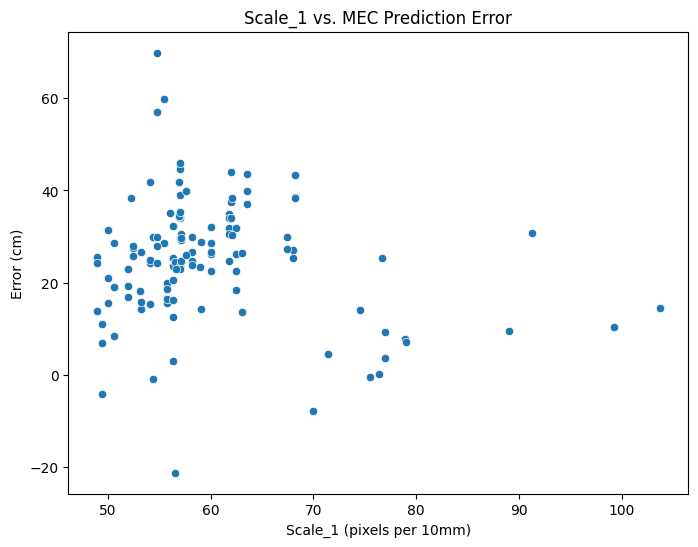

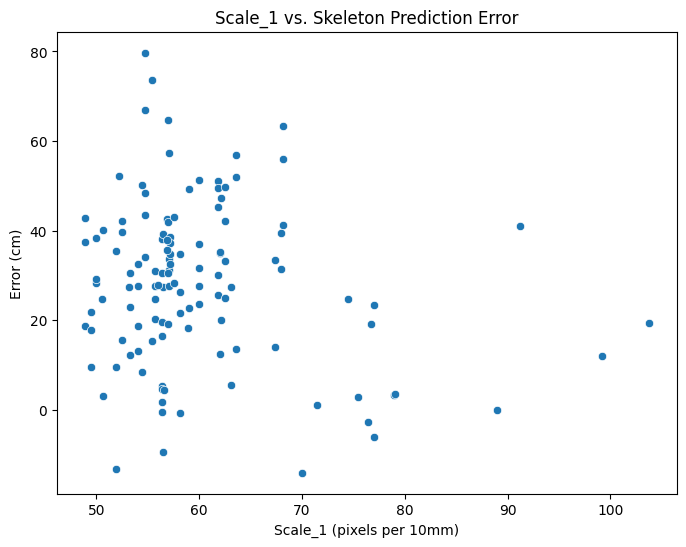

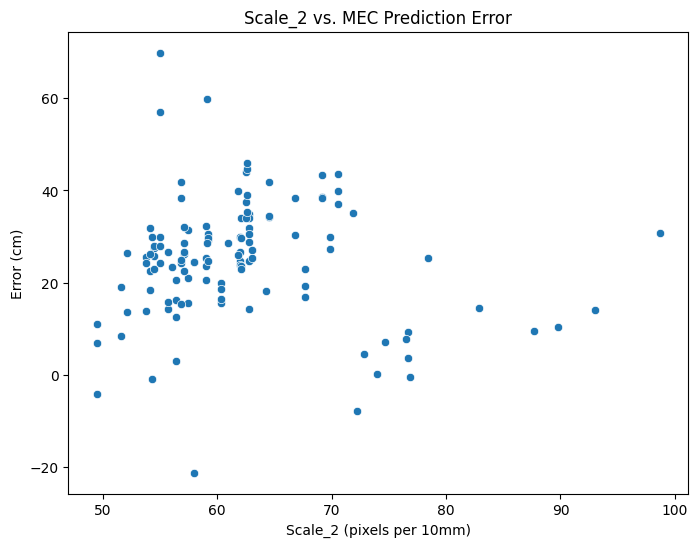

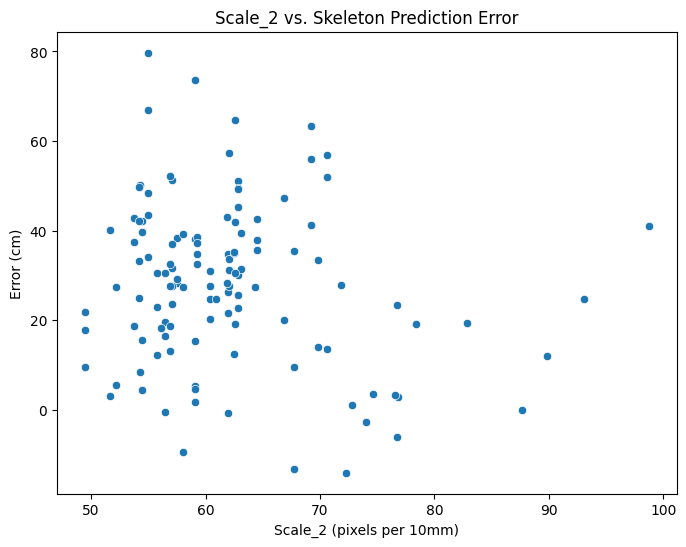

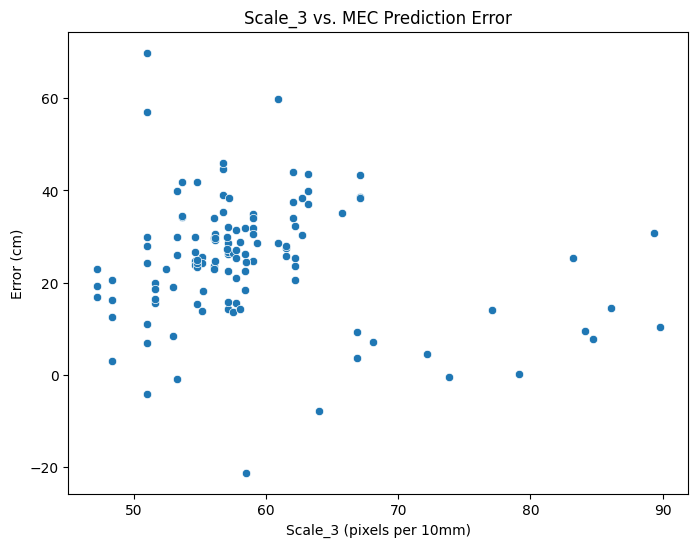

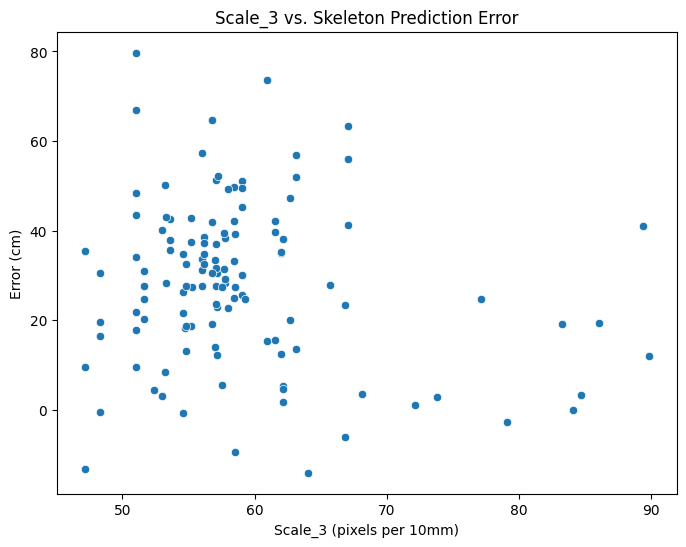

In [513]:
for i in range(1, 4):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=f'Scale_{i}', y='Error_MEC', data=df)
    plt.title(f'Scale_{i} vs. MEC Prediction Error')
    plt.xlabel(f'Scale_{i} (pixels per 10mm)')
    plt.ylabel('Error (cm)')
    plt.show()

    plt.figure(figsize=(8,6))
    sns.scatterplot(x=f'Scale_{i}', y='Error_Skeleton', data=df)
    plt.title(f'Scale_{i} vs. Skeleton Prediction Error')
    plt.xlabel(f'Scale_{i} (pixels per 10mm)')
    plt.ylabel('Error (cm)')
    plt.show()


In [514]:
df['SEM_Length'] = df['Std_Length'] / np.sqrt(3)  # Standard Error of the Mean
print(f"Standard Error of the Mean: {df['SEM_Length'].mean():.2f} cm")

Standard Error of the Mean: 4.20 cm


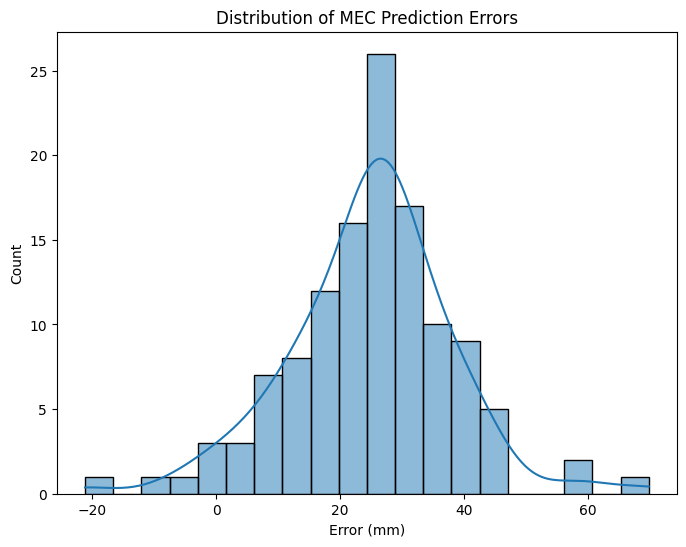

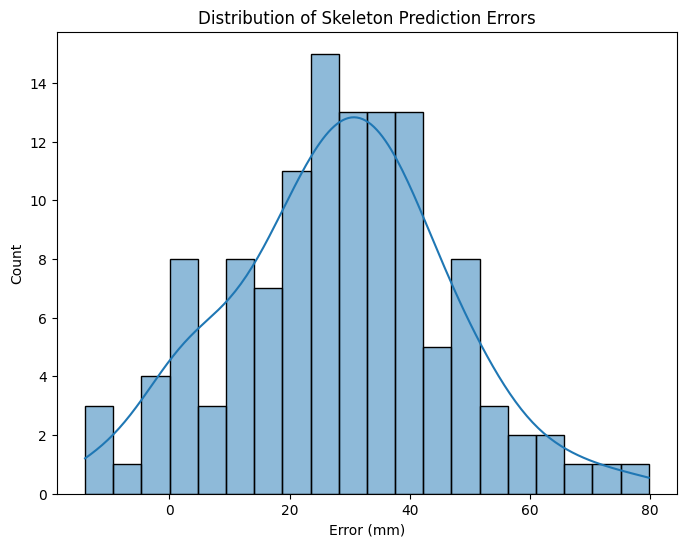

In [515]:
plt.figure(figsize=(8,6))
sns.histplot(df['Error_MEC'], bins=20, kde=True)
plt.xlabel('Error (mm)')
plt.title('Distribution of MEC Prediction Errors')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(df['Error_Skeleton'], bins=20, kde=True)
plt.xlabel('Error (mm)')
plt.title('Distribution of Skeleton Prediction Errors')
plt.show()


In [516]:
pond_stats = df.groupby('PondType').agg({
    'Mean_Length': ['mean', 'std'],
    'Abs_Error_MEC': ['mean', 'std'],
    'Error_Skeleton': ['mean', 'std']
})
print("Pond-wise statistics:\n", pond_stats)


Pond-wise statistics:
                       Mean_Length            Abs_Error_MEC             \
                             mean        std          mean        std   
PondType                                                                
pond_1\carapace\car    119.587619  17.805035     10.394315   8.670403   
pond_1\carapace\left    73.021133  23.583171     35.854537  12.614530   
pond_1\carapace\right  116.341756  18.716363     25.969182  10.099262   

                      Error_Skeleton             
                                mean        std  
PondType                                         
pond_1\carapace\car         9.129616  14.758059  
pond_1\carapace\left       43.730877  13.689515  
pond_1\carapace\right      28.691682  16.557994  


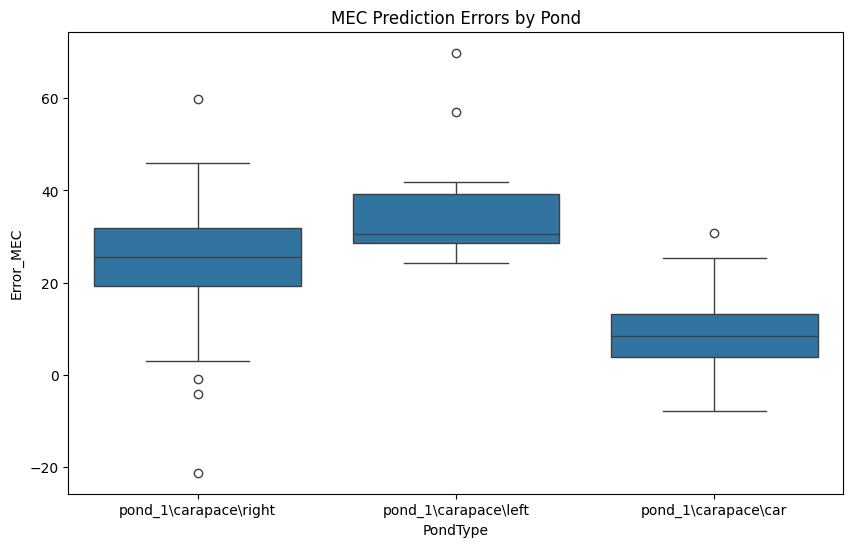

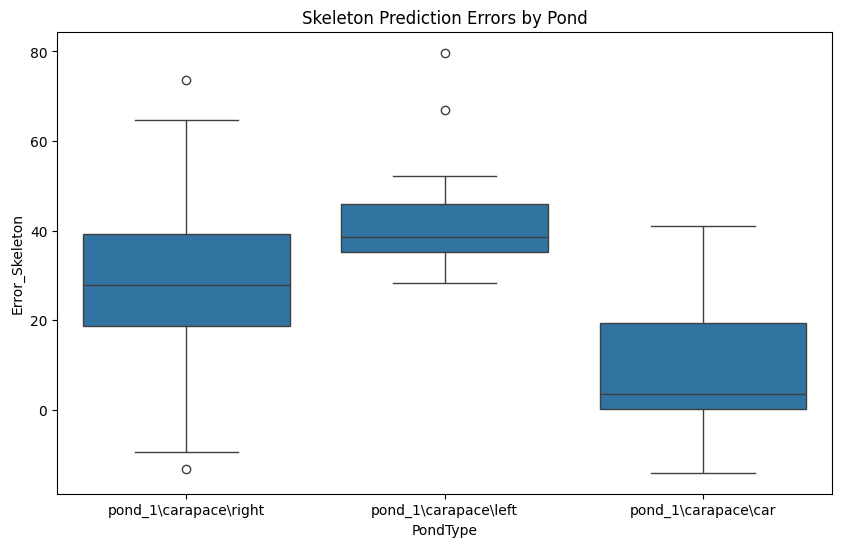

In [517]:
plt.figure(figsize=(10,6))
sns.boxplot(x='PondType', y='Error_MEC', data=df)
plt.title('MEC Prediction Errors by Pond')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='PondType', y='Error_Skeleton', data=df)
plt.title('Skeleton Prediction Errors by Pond')
plt.show()


In [518]:
import statsmodels.formula.api as smf

# MEC Method
model_mec = smf.ols('Error_MEC ~ Scale_1 + Scale_2 + Scale_3 + Std_Length + C(PondType)', data=df).fit()
print(model_mec.summary())

# Skeleton Method
model_skeleton = smf.ols('Error_Skeleton ~ Scale_1 + Scale_2 + Scale_3 + Std_Length + C(PondType)', data=df).fit()
print(model_skeleton.summary())


                            OLS Regression Results                            
Dep. Variable:              Error_MEC   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     17.92
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           1.38e-14
Time:                        20:00:56   Log-Likelihood:                -446.50
No. Observations:                 122   AIC:                             907.0
Df Residuals:                     115   BIC:                             926.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [519]:
corr_variability_mec = df['Std_Length'].corr(df['Abs_Error_MEC'])
corr_variability_skeleton = df['Std_Length'].corr(df['Abs_Error_Skeleton'])
print(f"Correlation between Measurement Variability and MEC Error: {corr_variability_mec:.4f}")
print(f"Correlation between Measurement Variability and Skeleton Error: {corr_variability_skeleton:.4f}")


Correlation between Measurement Variability and MEC Error: -0.2249
Correlation between Measurement Variability and Skeleton Error: -0.1231


In [520]:
# Calculate RMSE for MEC method
rmse_mec = np.sqrt(np.mean(df['Error_MEC'] ** 2))
print(f"RMSE for MEC method: {rmse_mec:.2f} cm")

# Calculate RMSE for Skeleton method
rmse_skeleton = np.sqrt(np.mean(df['Error_Skeleton'] ** 2))
print(f"RMSE for Skeleton method: {rmse_skeleton:.2f} cm")


RMSE for MEC method: 28.07 cm
RMSE for Skeleton method: 33.52 cm


In [521]:
# Calculate MAPE for MEC method
df['APE_MEC'] = df['Abs_Error_MEC'] / df['Mean_Length']
mape_mec = df['APE_MEC'].mean() * 100
print(f"MAPE for MEC method: {mape_mec:.2f}%")

# Calculate MAPE for Skeleton method
df['APE_Skeleton'] = df['Abs_Error_Skeleton'] / df['Mean_Length']
mape_skeleton = df['APE_Skeleton'].mean() * 100
print(f"MAPE for Skeleton method: {mape_skeleton:.2f}%")


MAPE for MEC method: 25.64%
MAPE for Skeleton method: 29.19%


In [522]:
# Calculate Median Absolute Error for MEC method
median_abs_error_mec = df['Abs_Error_MEC'].median()
print(f"Median Absolute Error for MEC method: {median_abs_error_mec:.2f} mm")

# Calculate Median Absolute Error for Skeleton method
median_abs_error_skeleton = df['Abs_Error_Skeleton'].median()
print(f"Median Absolute Error for Skeleton method: {median_abs_error_skeleton:.2f} mm")


Median Absolute Error for MEC method: 25.43 mm
Median Absolute Error for Skeleton method: 28.39 mm


In [523]:
# Calculate 90th percentile of Absolute Errors
quantile_90_mec = df['Abs_Error_MEC'].quantile(0.90)
quantile_90_skeleton = df['Abs_Error_Skeleton'].quantile(0.90)

print(f"90th percentile of Absolute Error for MEC method: {quantile_90_mec:.2f} cm")
print(f"90th percentile of Absolute Error for Skeleton method: {quantile_90_skeleton:.2f} cm")


90th percentile of Absolute Error for MEC method: 38.99 cm
90th percentile of Absolute Error for Skeleton method: 50.07 cm


In [524]:
from scipy import stats

# For MEC method
df['Z_Error_MEC'] = stats.zscore(df['Error_MEC'])
outliers_mec = df[np.abs(df['Z_Error_MEC']) > 3]  # Outliers beyond 3 standard deviations

# For Skeleton method
df['Z_Error_Skeleton'] = stats.zscore(df['Error_Skeleton'])
outliers_skeleton = df[np.abs(df['Z_Error_Skeleton']) > 3]

print(f"Number of outliers for MEC method: {len(outliers_mec)}")
print(f"Number of outliers for Skeleton method: {len(outliers_skeleton)}")

Number of outliers for MEC method: 2
Number of outliers for Skeleton method: 0


In [525]:
#find what images has    outliers Label	PrawnID

outliers_mec = outliers_mec[['Label', 'PrawnID']]
outliers_skeleton = outliers_skeleton[['Label', 'PrawnID']]
print(outliers_mec)
print(outliers_skeleton)
#how big are the outliers


                                                 Label  PrawnID
34   full body:undistorted_GX010080_212_2954.jpg_gamma  Prawn_2
101     full body:undistorted_GX010102_9_165.jpg_gamma  Prawn_2
Empty DataFrame
Columns: [Label, PrawnID]
Index: []


In [526]:
#remove outliers and calcculate errors again
df_new = df[(np.abs(stats.zscore(df['Error_MEC'])) < 3)]
df_new = df_new[(np.abs(stats.zscore(df_new['Error_Skeleton'])) < 3)]

# MEC Method
mae_mec_new = df_new['Abs_Error_MEC'].mean()
std_error_mec_new = df_new['Error_MEC'].std()

# Skeleton Method
mae_skeleton_new = df_new['Abs_Error_Skeleton'].mean()
std_error_skeleton_new = df_new['Error_Skeleton'].std()

print(f"MEC Method - MAE: {mae_mec_new:.2f} cm, Std Error: {std_error_mec_new:.2f} cm")
print(f"Skeleton Method - MAE: {mae_skeleton_new:.2f} cm, Std Error: {std_error_skeleton_new:.2f} cm")

MEC Method - MAE: 25.06 cm, Std Error: 11.85 cm
Skeleton Method - MAE: 28.80 cm, Std Error: 17.23 cm


In [527]:
#df_new mape
df_new['APE_MEC'] = df_new['Abs_Error_MEC'] / df_new['Mean_Length']
mape_mec_new = df_new['APE_MEC'].mean() * 100

df_new['APE_Skeleton'] = df_new['Abs_Error_Skeleton'] / df_new['Mean_Length']
mape_skeleton_new = df_new['APE_Skeleton'].mean() * 100

print(f"MAPE for MEC method: {mape_mec_new:.2f}%")
print(f"MAPE for Skeleton method: {mape_skeleton_new:.2f}%")

MAPE for MEC method: 24.72%
MAPE for Skeleton method: 28.22%


In [528]:
#mape for the error between each legnth_1, length_2, length_3 and the real length
for i in range(1, 4):
    df_new[f'error_length_MEC_{i}'] = abs(df_new['RealLength_MEC(cm)'] - df_new[f'Length_{i}'])
    df_new[f'error_length_ske_{i}'] = abs(df_new['RealLength_Skeleton(cm)'] - df_new[f'Length_{i}'])

mae_mec = []
mae_ske = []
std_mec = []
std_ske = []
corr_mec = []
corr_ske = []
mape= []
for i in range(1, 4):
    mae_mec.append(df_new[f'error_length_MEC_{i}'].mean())
    mae_ske.append(df_new[f'error_length_ske_{i}'].mean())
    std_mec.append(df_new[f'error_length_MEC_{i}'].std())
    std_ske.append(df_new[f'error_length_ske_{i}'].std())
    corr_mec.append(df_new['RealLength_MEC(cm)'].corr(df_new[f'Length_{i}']))
    corr_ske.append(df_new['RealLength_Skeleton(cm)'].corr(df_new[f'Length_{i}']))
    mape.append(df_new[f'error_length_MEC_{i}'].mean()/df_new['RealLength_MEC(cm)'].mean()*100)
    mape.append(df_new[f'error_length_ske_{i}'].mean()/df_new['RealLength_Skeleton(cm)'].mean()*100)

print(f'mape {mape}')

print(f'median error',df_new['error_length_MEC_1'].median())
print(f'median error',df_new['error_length_MEC_2'].median())
print(f'median error',df_new['error_length_MEC_3'].median())
print(f'median error',df_new['error_length_ske_1'].median())
print(f'median error',df_new['error_length_ske_2'].median())
print(f'median error',df_new['error_length_ske_3'].median())
  

mape [19.029759820629508, 21.25473146479335, 20.16172064274112, 22.168927499414284, 16.502544989359425, 19.060117905972543]
median error 27.2772162388097
median error 28.023972333761698
median error 22.562219425355053
median error 29.250425063282457
median error 32.8066111800877
median error 25.247229679677254


In [529]:
#now medoan *error* per pond type
pond_stats = df_new.groupby('PondType').agg({
    'error_length_MEC_1': ['median'],
    'error_length_MEC_2': ['median'],
    'error_length_MEC_3': ['median'],
    'error_length_ske_1': ['median'],
    'error_length_ske_2': ['median'],
    'error_length_ske_3': ['median']
})

print("Pond-wise statistics:\n", pond_stats)

#mape per pond type
pond_stats = df_new.groupby('PondType').agg({
    'error_length_MEC_1': ['mean'],
    'error_length_MEC_2': ['mean'],
    'error_length_MEC_3': ['mean'],
    'error_length_ske_1': ['mean'],
    'error_length_ske_2': ['mean'],
    'error_length_ske_3': ['mean']
})

print("Pond-wise statistics:\n", pond_stats)

Pond-wise statistics:
                       error_length_MEC_1 error_length_MEC_2  \
                                  median             median   
PondType                                                      
pond_1\carapace\car             9.752689           7.491891   
pond_1\carapace\left           31.792363          34.077997   
pond_1\carapace\right          27.096506          28.232697   

                      error_length_MEC_3 error_length_ske_1  \
                                  median             median   
PondType                                                      
pond_1\carapace\car             7.513962           8.264005   
pond_1\carapace\left           26.077706          41.289117   
pond_1\carapace\right          23.360772          28.983542   

                      error_length_ske_2 error_length_ske_3  
                                  median             median  
PondType                                                     
pond_1\carapace\car             6

In [530]:
pond_metrics = {}

for pond in ponds:
    pond_data = df[df['PondType'] == pond]

    # Calculate error metrics for MEC method
    mae_mec = pond_data['Abs_Error_MEC'].abs().mean()
    rmse_mec = np.sqrt((pond_data['Abs_Error_MEC'] ** 2).mean())

    # Calculate error metrics for Skeleton method
    mae_skeleton = pond_data['Abs_Error_Skeleton'].abs().mean()
    rmse_skeleton = np.sqrt((pond_data['Abs_Error_Skeleton'] ** 2).mean())

    pond_metrics[pond] = {
        'MAE_MEC': mae_mec,
        'RMSE_MEC': rmse_mec,
        'MAE_Skeleton': mae_skeleton,
        'RMSE_Skeleton': rmse_skeleton
    }

# Display the results
for pond, metrics in pond_metrics.items():
    print(f"\nPond: {pond}")
    print(f"  MEC Method - MAE: {metrics['MAE_MEC']:.2f} cm, RMSE: {metrics['RMSE_MEC']:.2f} cm")
    print(f"  Skeleton Method - MAE: {metrics['MAE_Skeleton']:.2f} cm, RMSE: {metrics['RMSE_Skeleton']:.2f} cm")



Pond: pond_1\carapace\right
  MEC Method - MAE: 25.97 cm, RMSE: 27.84 cm
  Skeleton Method - MAE: 29.20 cm, RMSE: 33.08 cm

Pond: pond_1\carapace\left
  MEC Method - MAE: 35.85 cm, RMSE: 37.87 cm
  Skeleton Method - MAE: 43.73 cm, RMSE: 45.69 cm

Pond: pond_1\carapace\car
  MEC Method - MAE: 10.39 cm, RMSE: 13.34 cm
  Skeleton Method - MAE: 12.38 cm, RMSE: 16.90 cm


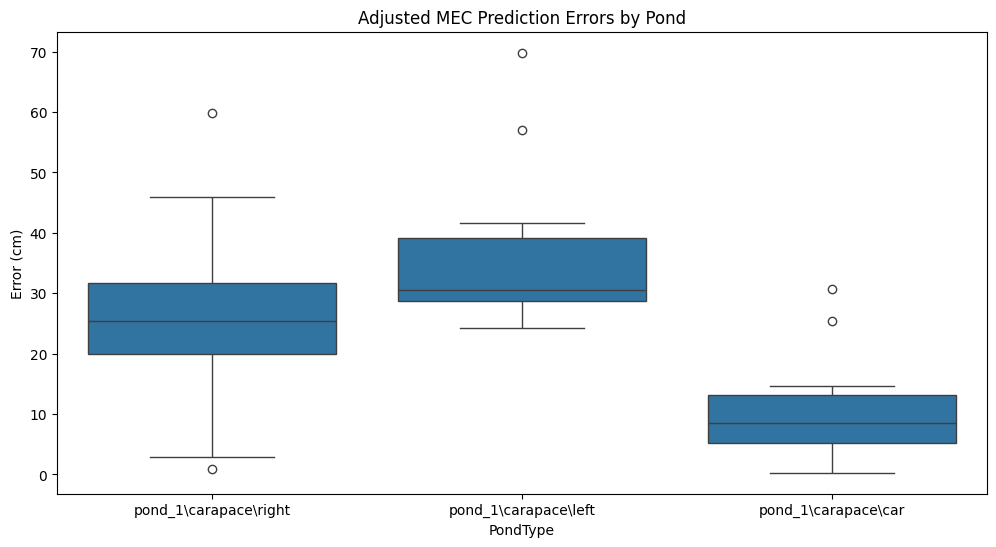

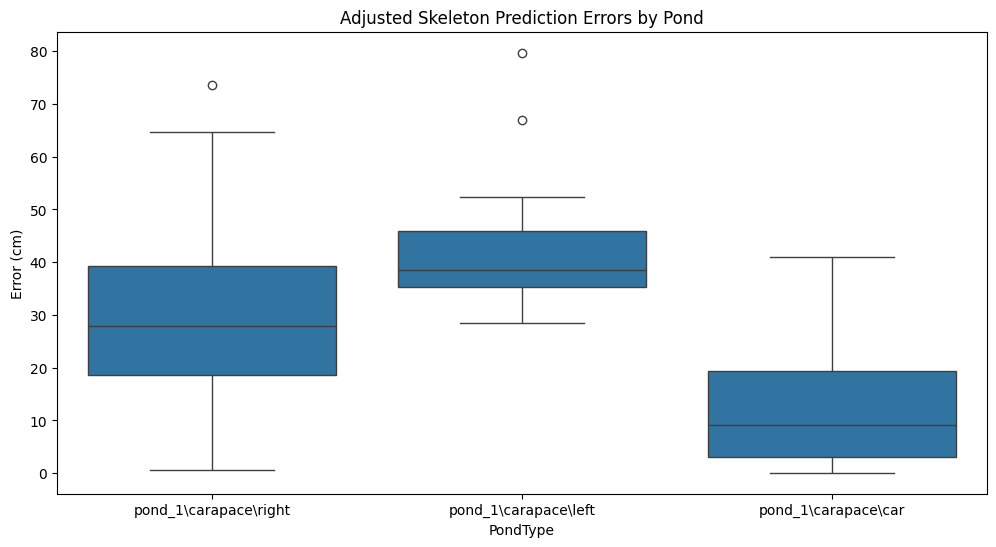

In [531]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots of errors by pond
plt.figure(figsize=(12,6))
sns.boxplot(x='PondType', y='Abs_Error_MEC', data=df)
plt.title('Adjusted MEC Prediction Errors by Pond')
plt.ylabel('Error (cm)')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='PondType', y='Abs_Error_Skeleton', data=df)
plt.title('Adjusted Skeleton Prediction Errors by Pond')
plt.ylabel('Error (cm)')
plt.show()


In [532]:
from scipy.stats import f_oneway

# For MEC method
error_groups_mec = [df[df['PondType'] == pond]['Abs_Error_MEC'] for pond in ponds]
#anova test per pond type for MEC method
f_stat_mec, p_value_mec = f_oneway(*error_groups_mec)

print(f"MEC Method - ANOVA F-statistic: {f_stat_mec:.2f}, p-value: {p_value_mec:.4f}")

# For Skeleton method
error_groups_skeleton = [df[df['PondType'] == pond]['Abs_Error_Skeleton'] for pond in ponds]
f_stat_skeleton, p_value_skeleton = f_oneway(*error_groups_skeleton)
print(f"Skeleton Method - ANOVA F-statistic: {f_stat_skeleton:.2f}, p-value: {p_value_skeleton:.4f}")


MEC Method - ANOVA F-statistic: 22.79, p-value: 0.0000
Skeleton Method - ANOVA F-statistic: 15.74, p-value: 0.0000


In [533]:
# For MEC method
df['Error_MEC'] = df['RealLength_MEC(cm)'] - df['Mean_Length']
df['Abs_Error_MEC'] = df['Error_MEC'].abs()

# For Skeleton method
df['Error_Skeleton'] = df['RealLength_Skeleton(cm)'] - df['Mean_Length']
df['Abs_Error_Skeleton'] = df['Error_Skeleton'].abs()


In [534]:
# MEC method
mean_error_mec = df['Error_MEC'].mean()
std_error_mec = df['Error_MEC'].std()
print(f"MEC Method - Mean Error: {mean_error_mec:.2f} cm, Std Dev of Error: {std_error_mec:.2f} cm")

# Skeleton method
mean_error_skeleton = df['Error_Skeleton'].mean()
std_error_skeleton = df['Error_Skeleton'].std()
print(f"Skeleton Method - Mean Error: {mean_error_skeleton:.2f} cm, Std Dev of Error: {std_error_skeleton:.2f} cm")

#by pont type
pond_stats = df.groupby('PondType').agg({
    'Error_MEC': ['mean', 'std'],
    'Error_Skeleton': ['mean', 'std']
})
print("Pond-wise statistics:\n", pond_stats)

MEC Method - Mean Error: 24.83 cm, Std Dev of Error: 13.13 cm
Skeleton Method - Mean Error: 28.30 cm, Std Dev of Error: 18.05 cm
Pond-wise statistics:
                        Error_MEC            Error_Skeleton           
                            mean        std           mean        std
PondType                                                             
pond_1\carapace\car     9.234348   9.984785       9.129616  14.758059
pond_1\carapace\left   35.854537  12.614530      43.730877  13.689515
pond_1\carapace\right  25.403938  11.460761      28.691682  16.557994


In [535]:
from scipy import stats

# MEC method
t_stat_mec, p_value_mec = stats.ttest_1samp(df['Error_MEC'], 0)
print(f"MEC Method - t-statistic: {t_stat_mec:.2f}, p-value: {p_value_mec:.4f}")

# Skeleton method
t_stat_skeleton, p_value_skeleton = stats.ttest_1samp(df['Error_Skeleton'], 0)
print(f"Skeleton Method - t-statistic: {t_stat_skeleton:.2f}, p-value: {p_value_skeleton:.4f}")


MEC Method - t-statistic: 20.89, p-value: 0.0000
Skeleton Method - t-statistic: 17.32, p-value: 0.0000


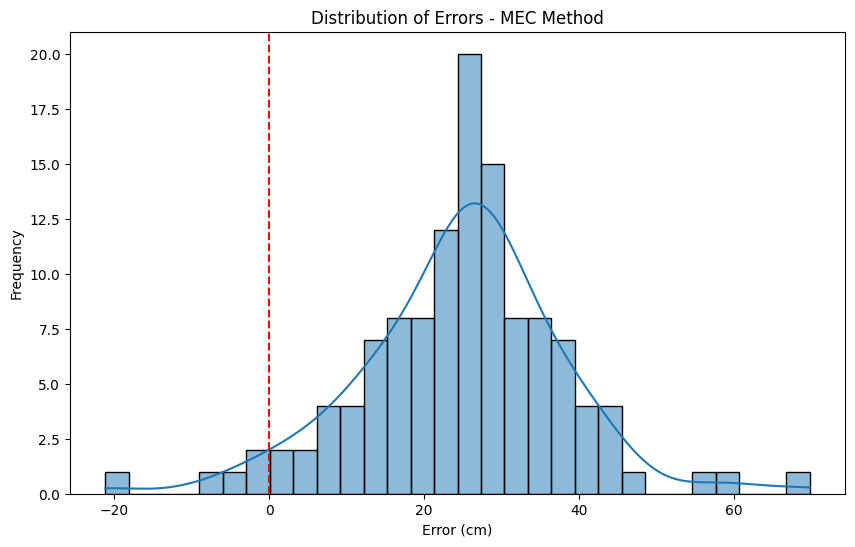

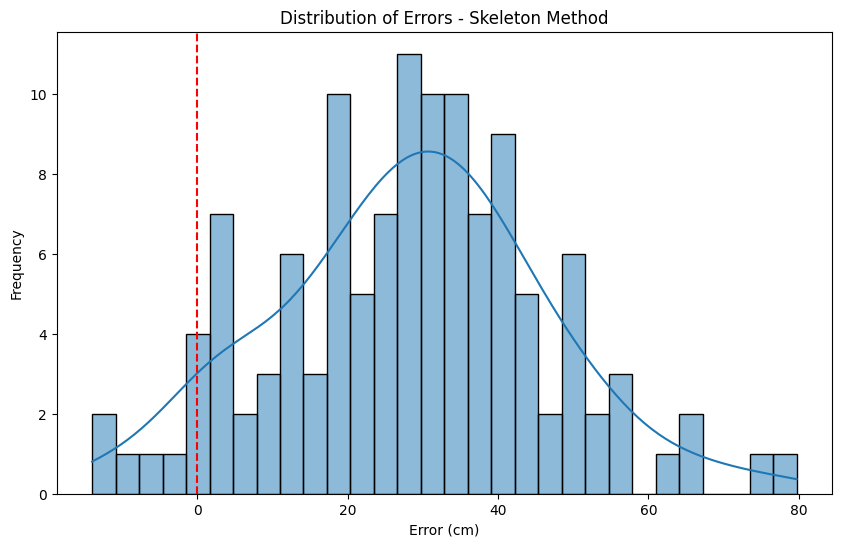

In [536]:
import matplotlib.pyplot as plt
import seaborn as sns

# MEC method
plt.figure(figsize=(10,6))
sns.histplot(df['Error_MEC'], bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribution of Errors - MEC Method')
plt.xlabel('Error (cm)')
plt.ylabel('Frequency')
plt.show()

# Skeleton method
plt.figure(figsize=(10,6))
sns.histplot(df['Error_Skeleton'], bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribution of Errors - Skeleton Method')
plt.xlabel('Error (cm)')
plt.ylabel('Frequency')
plt.show()


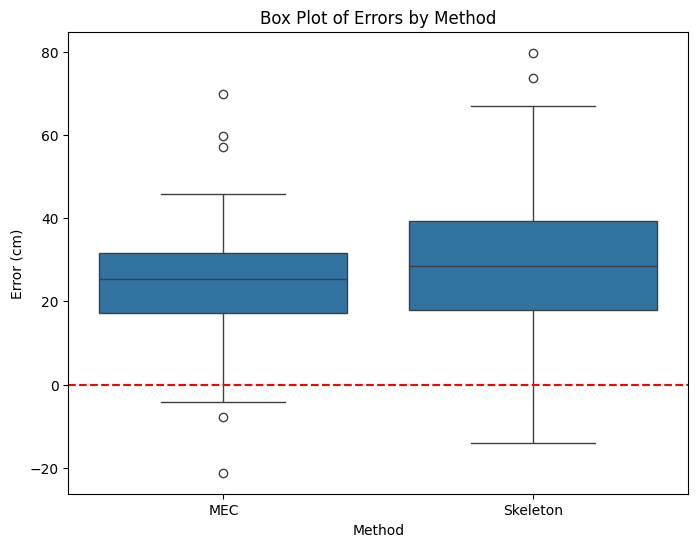

In [537]:
# Combine errors into a single DataFrame for easier plotting
errors_df = pd.DataFrame({
    'Error': pd.concat([df['Error_MEC'], df['Error_Skeleton']], ignore_index=True),
    'Method': ['MEC'] * len(df) + ['Skeleton'] * len(df)
})

plt.figure(figsize=(8,6))
sns.boxplot(x='Method', y='Error', data=errors_df)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Box Plot of Errors by Method')
plt.ylabel('Error (cm)')
plt.show()


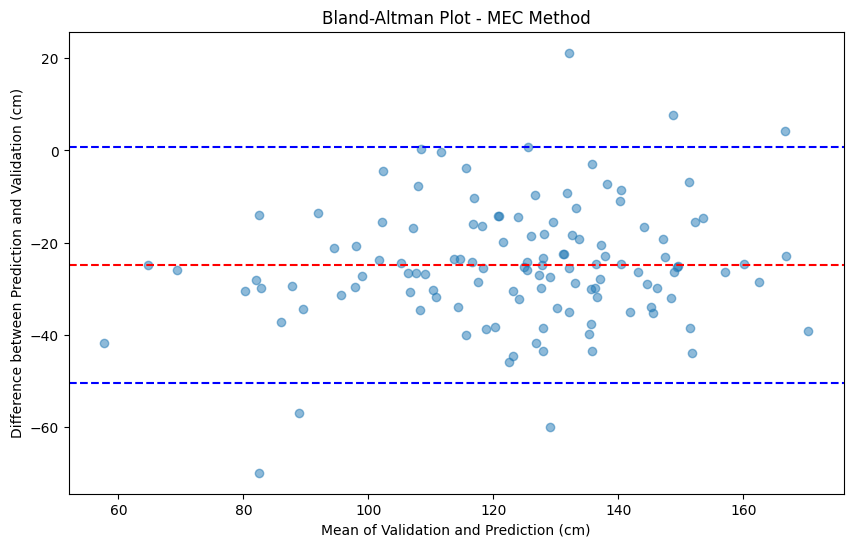

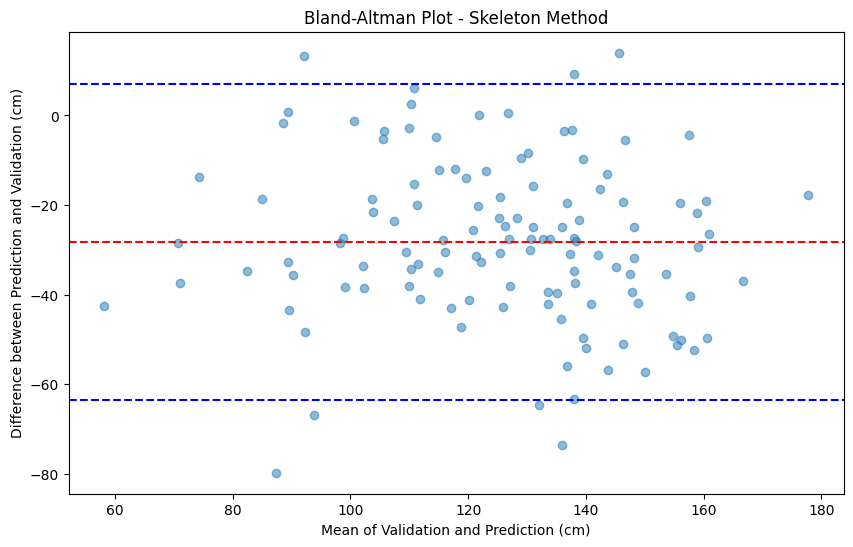

In [538]:
# Function to create Bland-Altman plot
def bland_altman_plot(data1, data2, method_name):
    import matplotlib.pyplot as plt
    mean = np.mean([data1, data2], axis=0)
    diff = data1 - data2
    md = np.mean(diff)
    sd = np.std(diff)

    plt.figure(figsize=(10,6))
    plt.scatter(mean, diff, alpha=0.5)
    plt.axhline(md, color='red', linestyle='--')
    plt.axhline(md + 1.96*sd, color='blue', linestyle='--')
    plt.axhline(md - 1.96*sd, color='blue', linestyle='--')
    plt.xlabel('Mean of Validation and Prediction (cm)')
    plt.ylabel('Difference between Prediction and Validation (cm)')
    plt.title(f'Bland-Altman Plot - {method_name}')
    plt.show()

# MEC method
bland_altman_plot(df['Mean_Length'], df['RealLength_MEC(cm)'], 'MEC Method')

# Skeleton method
bland_altman_plot(df['Mean_Length'], df['RealLength_Skeleton(cm)'], 'Skeleton Method')


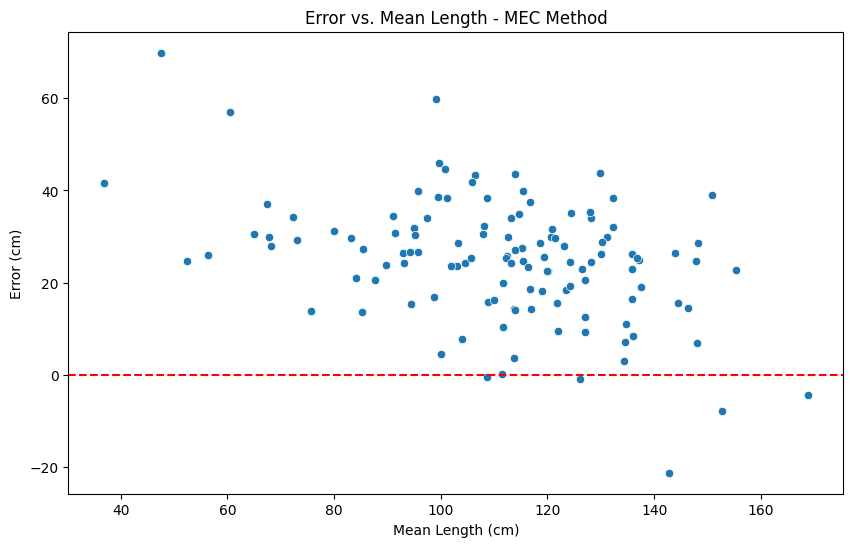

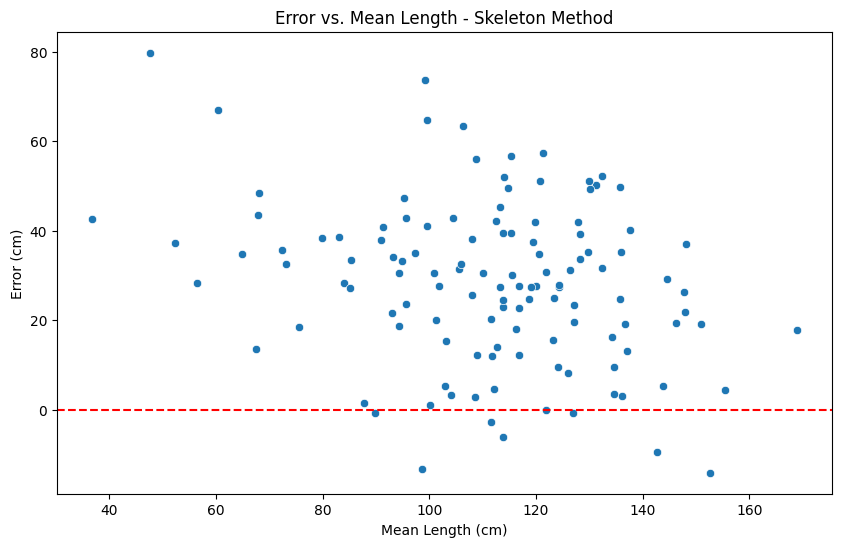

In [539]:
# MEC method
plt.figure(figsize=(10,6))
sns.scatterplot(x='Mean_Length', y='Error_MEC', data=df)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Error vs. Mean Length - MEC Method')
plt.xlabel('Mean Length (cm)')
plt.ylabel('Error (cm)')
plt.show()

# Skeleton method
plt.figure(figsize=(10,6))
sns.scatterplot(x='Mean_Length', y='Error_Skeleton', data=df)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Error vs. Mean Length - Skeleton Method')
plt.xlabel('Mean Length (cm)')
plt.ylabel('Error (cm)')
plt.show()


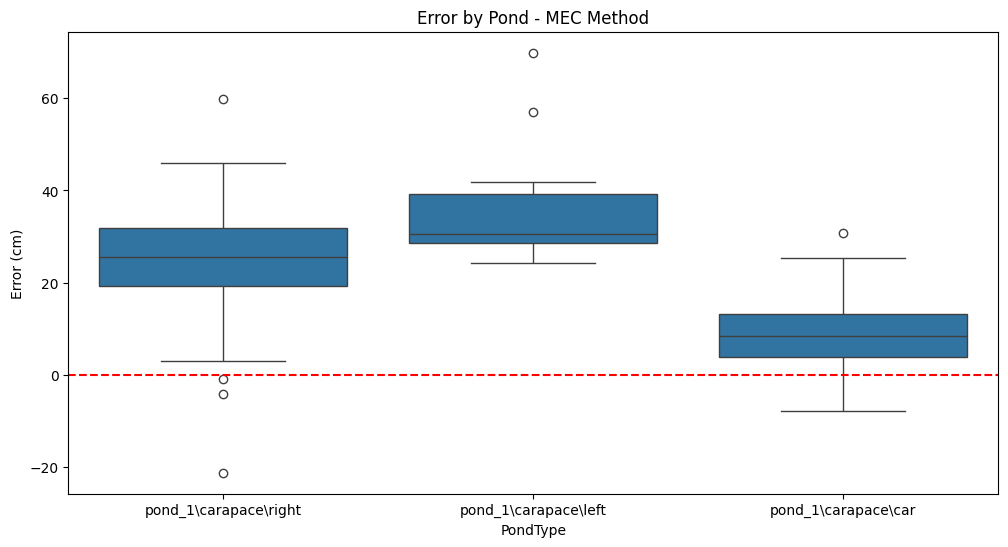

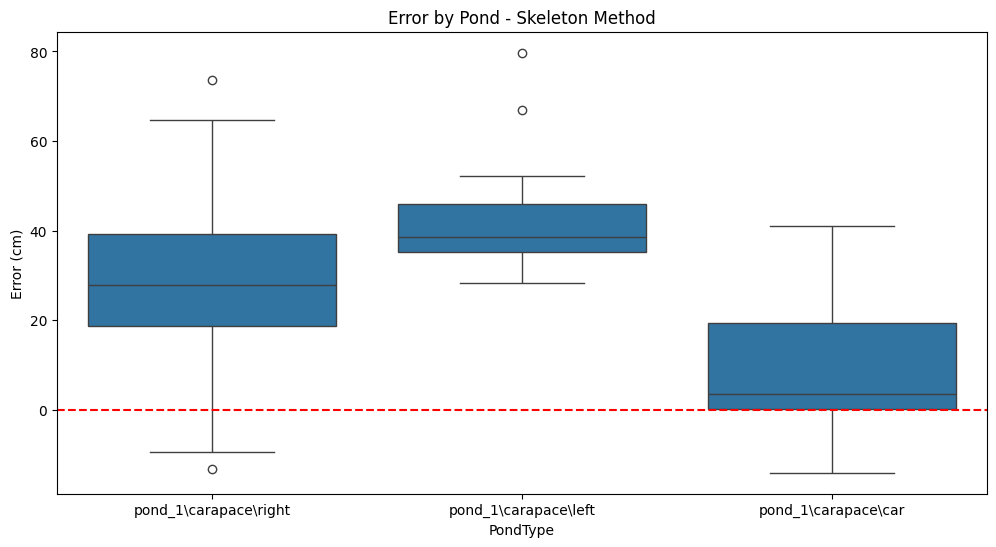

In [540]:
# Box plot of errors by pond
plt.figure(figsize=(12,6))
sns.boxplot(x='PondType', y='Error_MEC', data=df)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Error by Pond - MEC Method')
plt.ylabel('Error (cm)')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='PondType', y='Error_Skeleton', data=df)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Error by Pond - Skeleton Method')
plt.ylabel('Error (cm)')
plt.show()


In [541]:
from scipy.stats import f_oneway

# For MEC method
error_groups_mec = [df[df['PondType'] == pond]['Error_MEC'] for pond in df['PondType'].unique()]
f_stat_mec, p_value_mec = f_oneway(*error_groups_mec)
print(f"MEC Method - ANOVA F-statistic: {f_stat_mec:.2f}, p-value: {p_value_mec:.4f}")

# For Skeleton method
error_groups_skeleton = [df[df['PondType'] == pond]['Error_Skeleton'] for pond in df['PondType'].unique()]
f_stat_skeleton, p_value_skeleton = f_oneway(*error_groups_skeleton)
print(f"Skeleton Method - ANOVA F-statistic: {f_stat_skeleton:.2f}, p-value: {p_value_skeleton:.4f}")


MEC Method - ANOVA F-statistic: 20.05, p-value: 0.0000
Skeleton Method - ANOVA F-statistic: 16.93, p-value: 0.0000


In [542]:
# For MEC method
df['Mean_Scale'] = df[['Scale_1', 'Scale_2', 'Scale_3']].mean(axis=1)
corr_scale_error_mec = df['Mean_Scale'].corr(df['Error_MEC'])
print(f"Correlation between Mean Scale and Error (MEC): {corr_scale_error_mec:.4f}")

# For Skeleton method
corr_scale_error_skeleton = df['Mean_Scale'].corr(df['Error_Skeleton'])
print(f"Correlation between Mean Scale and Error (Skeleton): {corr_scale_error_skeleton:.4f}")


Correlation between Mean Scale and Error (MEC): -0.1471
Correlation between Mean Scale and Error (Skeleton): -0.1876


# carapace evaluation

Average standard deviation of lengths: 3.14 cm
MAE: 5.82 mm
STD: 7.04 mm
RMSE: 7.85 mm
Correlation between RealLength and Mean_Length: 0.5012


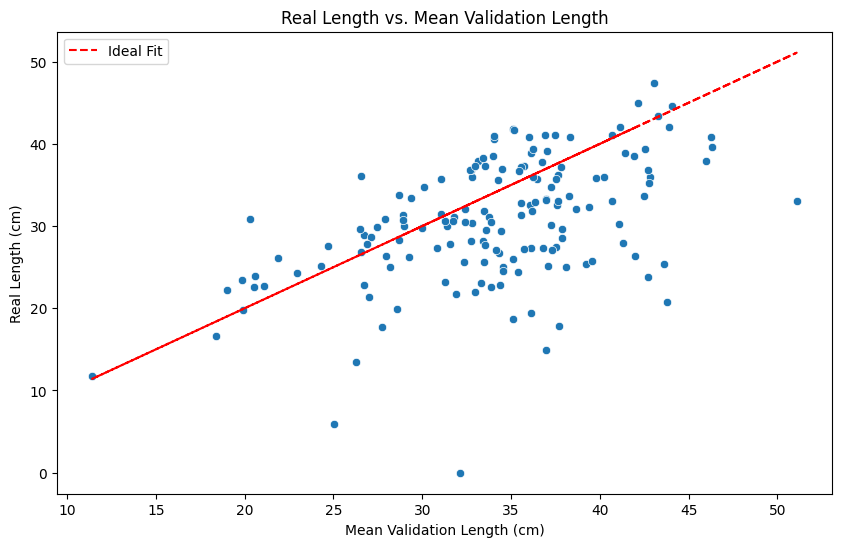

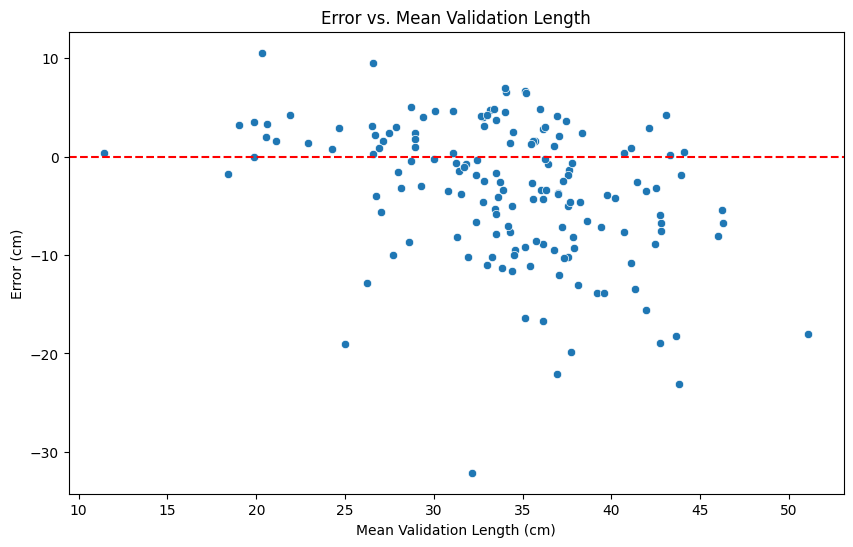

In [543]:
df_carapace=pd.read_excel(r'C:\Users\gbo10\Videos\research\counting_research_algorithms\fifty_one\measurements\Updated_Filtered_Data_with_real_length.xlsx')

# Calculate the mean and standard deviation of the three lengths for each prawn
df_carapace['Mean_Length'] = df_carapace[['Length_1', 'Length_2', 'Length_3']].mean(axis=1)
df_carapace['Std_Length'] = df_carapace[['Length_1', 'Length_2', 'Length_3']].std(axis=1)
# Overall statistics
overall_mean_std = df_carapace['Std_Length'].mean()
print(f"Average standard deviation of lengths: {overall_mean_std:.2f} cm")

df_carapace['error']=df_carapace['RealLength(cm)']-df_carapace['Mean_Length']
df_carapace['abs_error']=df_carapace['error'].abs()

#mae    
mae=df_carapace['abs_error'].mean()

#std
std=df_carapace['error'].std()

#rmse
rmse=np.sqrt((df_carapace['error'] ** 2).mean())

print(f"MAE: {mae:.2f} mm")
print(f"STD: {std:.2f} mm")
print(f"RMSE: {rmse:.2f} mm")

#correlation

corr = df_carapace['RealLength(cm)'].corr(df_carapace['Mean_Length'])
print(f"Correlation between RealLength and Mean_Length: {corr:.4f}")

#plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Mean_Length', y='RealLength(cm)', data=df_carapace)
plt.plot(df_carapace['Mean_Length'], df_carapace['Mean_Length'], 'r--', label='Ideal Fit')
plt.xlabel('Mean Validation Length (cm)')
plt.ylabel('Real Length (cm)')
plt.title('Real Length vs. Mean Validation Length')
plt.legend()

plt.show()

#errors
plt.figure(figsize=(10,6))
sns.scatterplot(x='Mean_Length', y='error', data=df_carapace)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Mean Validation Length (cm)')
plt.ylabel('Error (cm)')
plt.title('Error vs. Mean Validation Length')
plt.show()


In [544]:
#uncertainty
df_carapace['SEM_Length'] = df_carapace['Std_Length'] / np.sqrt(3)  # Since there are 3 measurements
print(f"Standard Error of the Mean: {df_carapace['SEM_Length'].mean():.2f} mm")

Standard Error of the Mean: 1.81 mm


In [545]:
#error without abs
df_carapace['error']=df_carapace['RealLength(cm)']-df_carapace['Mean_Length']
print(f"MAE: {df_carapace['error'].mean():.2f} mm")

MAE: -3.51 mm


In [546]:
df_carapace['MAPE'] = df_carapace['abs_error'] / df_carapace['Mean_Length']
mape = df_carapace['MAPE'].mean() * 100
print(f"MAPE : {mape:.2f}%")

MAPE : 16.89%


In [547]:
#median error
median_error=df_carapace['abs_error'].median()
print(f"Median Absolute Error: {median_error:.2f} mm")

Median Absolute Error: 4.16 mm


In [548]:
df_carapace['MAPE'] = df_carapace['abs_error'].median() / df_carapace['Mean_Length']
mape = df_carapace['MAPE'].mean() * 100
print(f"MAPE : {mape:.2f}%")

MAPE : 12.55%


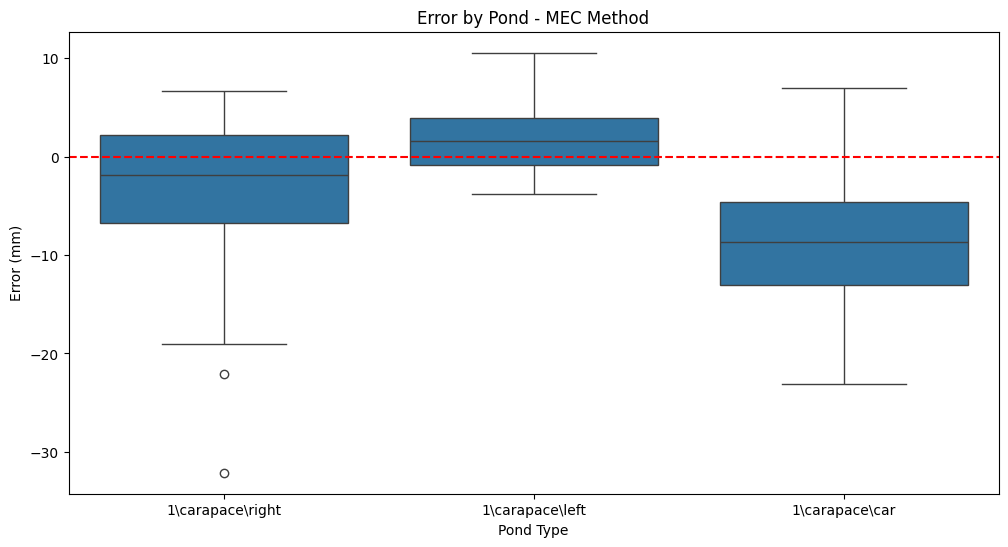

In [549]:
if 'Pond_Type' in df_carapace.columns:
    # MEC method
    plt.figure(figsize=(12,6))
    sns.boxplot(x='Pond_Type', y='error', data=df_carapace)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Pond Type')
    plt.ylabel('Error (mm)')
    plt.title('Error by Pond - MEC Method')
    plt.show()

    # Skeleton method

In [550]:
#MAPE by pond type
pond_stats = df_carapace.groupby('Pond_Type').agg({
    'MAPE': ['mean']
})
print("Pond-wise statistics:\n", pond_stats)

Pond-wise statistics:
                       MAPE
                      mean
Pond_Type                 
1\carapace\car    0.118886
1\carapace\left   0.188049
1\carapace\right  0.122350


In [551]:
#find outliers and their errors
from scipy import stats

outliers = df_carapace[(np.abs(stats.zscore(df_carapace['abs_error'])) > 3)]

print(f"Number of outliers: {len(outliers)}")


Number of outliers: 0


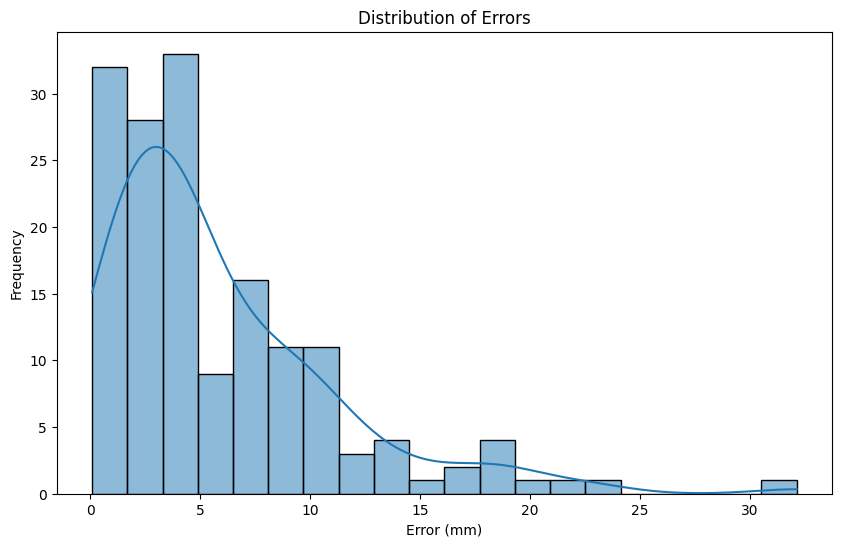

In [552]:
#distribution of errors
plt.figure(figsize=(10,6))
sns.histplot(df_carapace['abs_error'], bins=20, kde=True)
plt.xlabel('Error (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.show()


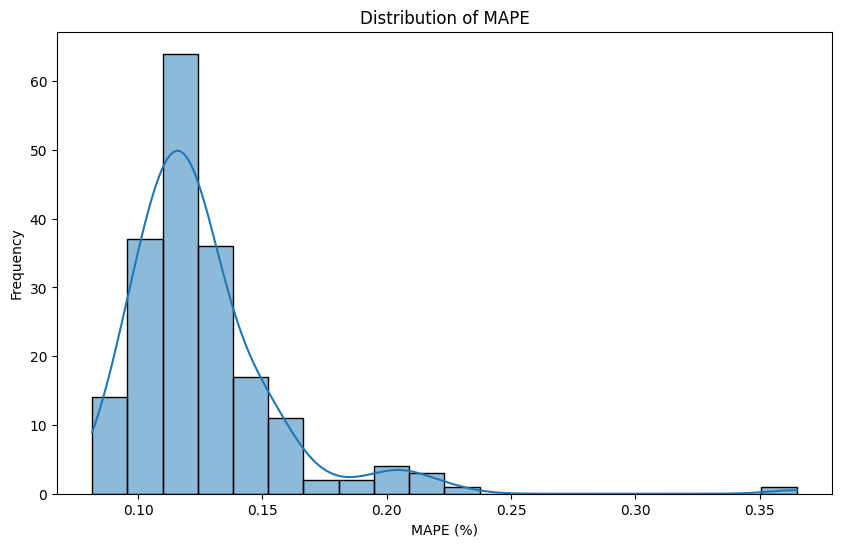

In [553]:
#distrbution in mape
plt.figure(figsize=(10,6))
sns.histplot(df_carapace['MAPE'], bins=20, kde=True)
plt.xlabel('MAPE (%)')
plt.ylabel('Frequency')
plt.title('Distribution of MAPE')
plt.show()


In [554]:
#remove nan pond type

df_carapace = df_carapace.dropna(subset=['Pond_Type'])

for pond in df_carapace['Pond_Type'].unique():
    pond_data = df_carapace[df_carapace['Pond_Type'] == pond]

    # Calculate error metrics
    mae = pond_data['abs_error'].mean()
    rmse = np.sqrt((pond_data['abs_error'] ** 2).mean())
    mape = pond_data['MAPE'].mean() * 100

    print(f"\nPond: {pond}")
    print(f"  MAE: {mae:.2f} mm")
    print(f"  RMSE: {rmse:.2f} mm")
    print(f"  MAPE: {mape:.2f}%")


# Create groups of absolute errors for each pond type



Pond: 1\carapace\right
  MAE: 5.20 mm
  RMSE: 7.17 mm
  MAPE: 12.24%

Pond: 1\carapace\left
  MAE: 3.47 mm
  RMSE: 4.51 mm
  MAPE: 18.80%

Pond: 1\carapace\car
  MAE: 9.48 mm
  RMSE: 11.07 mm
  MAPE: 11.89%


In [555]:
#f one way test

from scipy.stats import f_oneway

for pond in df_carapace['Pond_Type'].unique():
    pond_data = df_carapace[df_carapace['Pond_Type'] == pond]
    f_stat, p_value = f_oneway(pond_data['RealLength(cm)'], pond_data['Mean_Length'])
    print(f"Pond: {pond}, F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

Pond: 1\carapace\right, F-statistic: 10.67, p-value: 0.0013
Pond: 1\carapace\left, F-statistic: 0.83, p-value: 0.3700
Pond: 1\carapace\car, F-statistic: 45.73, p-value: 0.0000


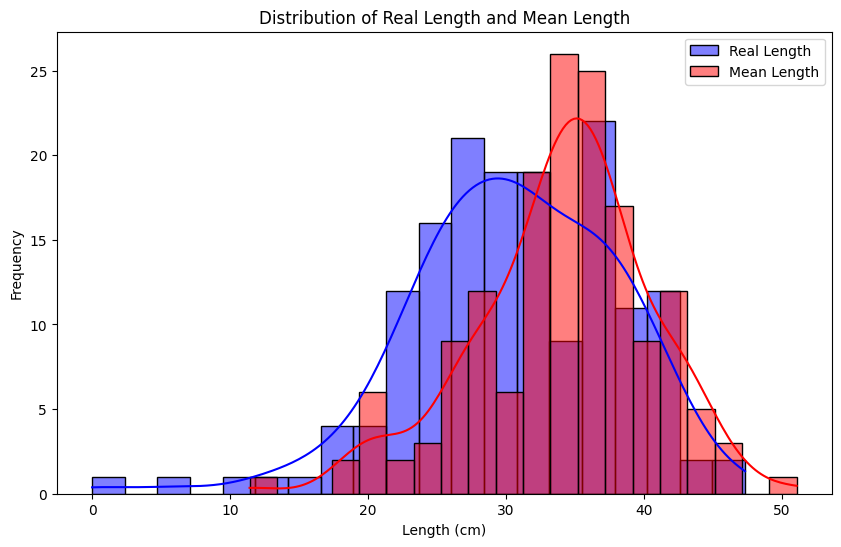

In [556]:
#distribution of length and real length

plt.figure(figsize=(10,6))
sns.histplot(df_carapace['RealLength(cm)'], bins=20, kde=True, color='blue', label='Real Length')
sns.histplot(df_carapace['Mean_Length'], bins=20, kde=True, color='red', label='Mean Length')
plt.xlabel('Length (cm)')
plt.ylabel('Frequency')

plt.title('Distribution of Real Length and Mean Length')

plt.legend()
plt.show()

In [557]:
#shapiro test

from scipy.stats import shapiro

stat, p = shapiro(df_carapace['Mean_Length'])
print(f"Shapiro-Wilk Test for Mean Length: p-value = {p:.4f}")

stat, p = shapiro(df_carapace['RealLength(cm)'])
print(f"Shapiro-Wilk Test for Real Length: p-value = {p:.4f}")





Shapiro-Wilk Test for Mean Length: p-value = 0.0092
Shapiro-Wilk Test for Real Length: p-value = 0.0039


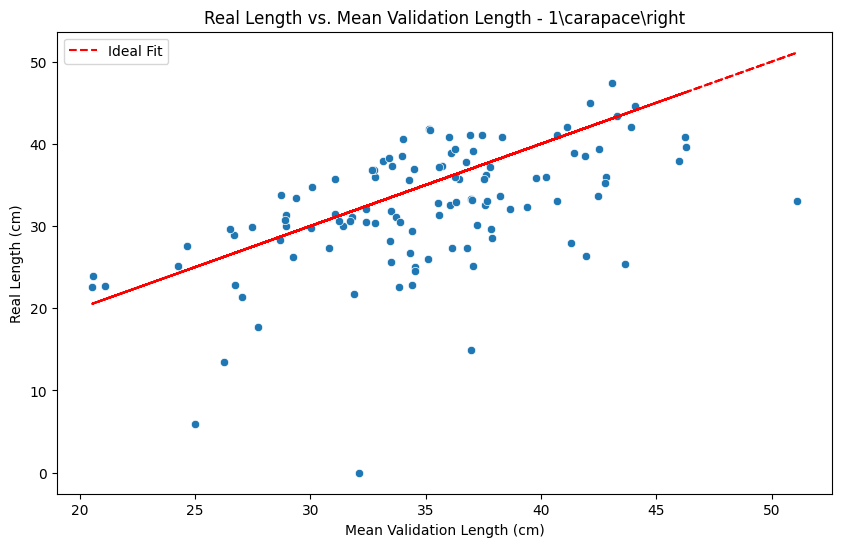

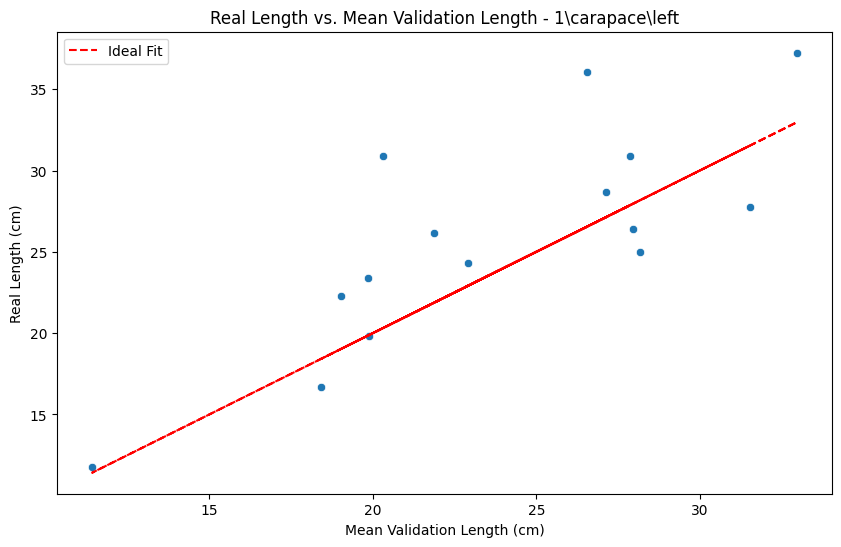

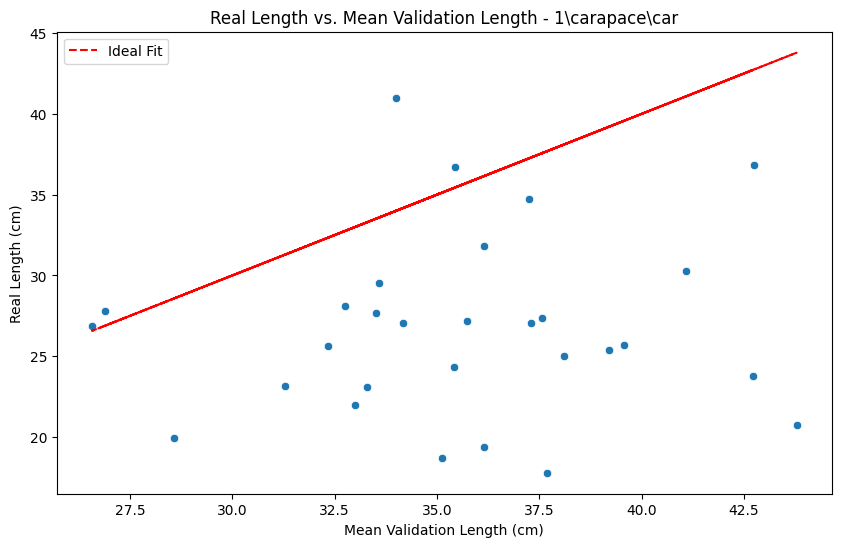

In [558]:
#scatter plot of length and real length
for pond in df_carapace['Pond_Type'].unique():
    pond_data = df_carapace[df_carapace['Pond_Type'] == pond]
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='Mean_Length', y='RealLength(cm)', data=pond_data)
    plt.plot(pond_data['Mean_Length'], pond_data['Mean_Length'], 'r--', label='Ideal Fit')
    plt.xlabel('Mean Validation Length (cm)')
    plt.ylabel('Real Length (cm)')
    plt.title(f'Real Length vs. Mean Validation Length - {pond}')
    plt.legend()
    plt.show()
    

In [559]:
#how ground truth and prediction are correlated
corr = df_carapace['RealLength(cm)'].corr(df_carapace['Mean_Length'])
print(f"Correlation between Real Length and Mean Length: {corr:.4f}")

Correlation between Real Length and Mean Length: 0.5012
